# Exploratory Data Analysis (EDA) 

In [92]:
# TO DO: fix requirements.txt file 
# Make dicts more efficient
# Remember that virtual environment is salary_env

## Imports

In [132]:
# Standard library imports
import os
import sys
from collections import defaultdict

# Third-party imports
import matplotlib.pyplot as plt
import missingno as msno  
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

# Local imports
import utils.analysis as af
import utils.plotting as pf
import utils.preprocessor as mf
import utils.salary_extractor as sf
import utils.text_parser as tf
from utils.dictionaries import (CONTEXT_PATTERNS, COUNTRIES_LANGUAGES, 
                              DTYPE_DICT, KEYWORD_MAP, LANGUAGE_MAP)

# Activate autoreload for custom modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

# File path definitions
DATA_PATH = os.getenv('DATA_PATH', 'data/') 
MISSING = os.path.join(DATA_PATH, 'df_FRA_missing_data.csv')
         
COUNTRIES = ['Sweden', 'France', 'Italy'] 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Check we're in the right environment
print(sys.executable)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/salary_env/bin/python


## Load data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [4]:
# Import csv files with scraped data for resp. country 
dfs = {country: pd.read_csv(os.path.join(DATA_PATH, f'indeed_jobs_{country}.csv')) for country in COUNTRIES}

# Add USA data to the dictionary
dfs['USA'] = mf.merge_US_cities(['NY', 'LA', 'CHI'], os.path.join(DATA_PATH, 'indeed_jobs_'))

# Access individual country data as needed, e.g., dfs['Sweden']

Loaded data for NY
Column order for consistency: ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial data inspection

In [5]:
dfs['Sweden'].head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data+Analyst       Stockholm   
1   Data+Analyst       Stockholm   
2   Data+Analyst       Stockholm   
3   Data+Analyst       Stockholm   
4   Data+Analyst       Stockholm   

                                           job_title             company_name  \
0                  Data Analyst (Data Visualization)  Swedium Global Services   
1                                       Data Analyst               Deploja AB   
2                                       Data Analyst      Cubane Solutions AB   
3                                       Data Analyst                     Sobi   
4  Juniora Analysts till Operations, Engineering,...                 Deloitte   

           company_location         salary  \
0  Distansjobb in Stockholm  Not available   
1              169 73 Solna  Not available   
2                 Stockholm         Heltid   
3                 Stockholm         Heltid   
4          113 57 Stockholm         Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) \n \n Swediu...  
1  Role: \n \n Website Performance: Web analyst f...  
2  Responsibilities \n \n Website Performance:  W...  
3  Company Description \n  Statistics show that w...  
4  Företagsbeskrivning  \n \n \n Deloitte är en g...

In [6]:
dfs['France'].head()

page country                                           job_link  \
0     1  France  https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...   
1     1  France  https://www.indeed.fr/rc/clk?jk=71fa252714d41c...   
2     1  France  https://www.indeed.fr/rc/clk?jk=21f25c16a32522...   
3     1  France  https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...   
4     1  France  https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...   

  search_keyword search_location  \
0   Data+Analyst      Paris (75)   
1   Data+Analyst      Paris (75)   
2   Data+Analyst      Paris (75)   
3   Data+Analyst      Paris (75)   
4   Data+Analyst      Paris (75)   

                                           job_title            company_name  \
0                CDI - Data analyst KYC - Senior F/H       La Banque Postale   
1                                   Data Analyst F/H  IZI Solutions Durables   
2                                       Data analyst      Le Groupe La Poste   
3                                   Data Analyst H/F        GROUPE ID SEARCH   
4  Consultant Débutant Data Analyst en CDI - Pari...                      EY   

                        company_location  \
0                             Paris (75)   
1  Télétravail partiel à La Défense (92)   
2               Issy-les-Moulineaux (92)   
3                             Paris (75)   
4                       92037 La Défense   

                                              salary  \
0                                                CDI   
1                                                CDI   
2                                                CDI   
3  À partir de 35 000 € par an  -   CDI, Temps plein   
4                                                CDI   

                                     job_description  
0  INTRODUCTION \n  Au sein de la direction Data ...  
1  À propos  \n \n En 2019, le Groupe EDF veut re...  
2  La Poste Groupe change, nos métiers évoluent. ...  
3  Tertialis, société du groupe ID SEARCH, est sp...  
4  Participer à la digitalisation de nos clients ...

In [7]:
dfs['Italy'].head()

page country                                           job_link  \
0     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
1     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
3     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
4     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   

  search_keyword search_location  \
0   Data+Analyst     Roma, Lazio   
1   Data+Analyst     Roma, Lazio   
2   Data+Analyst     Roma, Lazio   
3   Data+Analyst     Roma, Lazio   
4   Data+Analyst     Roma, Lazio   

                                           job_title          company_name  \
0  Business Intelligence (Power BI) - Python- Bus...         Area IT Group   
1                                   Power Bi Analyst        Verisure Italy   
2                   IT Project Management Internship      Procter & Gamble   
3                   Credit & Collection Data Analyst  Verisure Italy S R L   
4                        Aeronautical System Analyst                adecco   

  company_location                        salary  \
0      Roma, Lazio  25.000 € - 40.000 € all'anno   
1       00144 Roma                 Not available   
2      Roma, Lazio                 Not available   
3       00144 Roma                 Not available   
4      Roma, Lazio                 Not available   

                                     job_description  
0  Ricerchiamo Sviluppatori in almeno uno dei seg...  
1  Ti piacerebbe far parte della multinazionale d...  
2  Job Location Rome   Job Description  INFORMATI...  
3  Ti piacerebbe far parte della multinazionale d...  
4  Per azienda leader a livello globale nella ges...

In [8]:
dfs['USA'].head()

page country                                           job_link  \
0     1     USA  https://www.indeed.com/rc/clk?jk=5bf7eb172149d...   
1     1     USA  https://www.indeed.com/rc/clk?jk=6b99bd10f1316...   
2     1     USA  https://www.indeed.com/rc/clk?jk=d70c515431fa2...   
3     1     USA  https://www.indeed.com/rc/clk?jk=3aa26222eadd6...   
4     1     USA  https://www.indeed.com/rc/clk?jk=3aa564ce173c8...   

  search_keyword search_location  \
0   Data+Analyst    New+York, NY   
1   Data+Analyst    New+York, NY   
2   Data+Analyst    New+York, NY   
3   Data+Analyst    New+York, NY   
4   Data+Analyst    New+York, NY   

                                           job_title        company_name  \
0                   Business Analyst (Data products)                 Aon   
1                                       Data Analyst         NYU Langone   
2                                       Data Analyst  NYU Langone Health   
3    Resy Marketing Data Analyst, Data and Analytics                Amex   
4  2025 University Graduate - Digital Strategy An...               Adobe   

              company_location                                         salary  \
0       Remote in New York, NY        $80,000 - $95,000 a year  -   Full-time   
1                 New York, NY         $32.38 - $39.01 an hour  -   Temporary   
2           New York, NY 10016  $67,771.14 - $75,000.00 a year  -   Full-time   
3  Hybrid work in New York, NY                      $60,000 - $110,000 a year   
4           New York, NY 10012       $53,900 - $101,450 a year  -   Full-time   

                                     job_description  
0  Senior Associate Consultant, Data Solutions   ...  
1  NYU Grossman School of Medicine  is one of the...  
2  NYU Grossman School of Medicine  is one of the...  
3  You Lead the Way. We’ve Got Your Back. \n With...  
4  Our Company   Changing the world through digit...

### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
shapes = pd.DataFrame({
   'Country': dfs.keys(),
   'Columns': [df.shape[1] for df in dfs.values()],
   'Rows': [df.shape[0] for df in dfs.values()]
})
print(shapes.to_string())

  Country  Columns  Rows
0  Sweden       10   320
1  France       10  2200
2   Italy       10   769
3     USA       10  1317


In [10]:
# Check data types
dfs['Sweden'].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Retrieve dictionary with preferred types 
# Convert object columns to strings to optimize performance
# Mixed columns with both numbers and strings should be kept as object, e.g.: company_location, salary, job_link
DTYPE_DICT

{'page': 'int64',
 'country': 'string',
 'job_link': 'object',
 'search_keyword': 'category',
 'search_location': 'string',
 'job_title': 'string',
 'company_name': 'string',
 'company_location': 'object',
 'salary': 'object',
 'job_description': 'string'}

In [12]:
# Convert columns to preferred data type
dfs = {country: df.astype(DTYPE_DICT) for country, df in dfs.items()}
# Verify
print(dfs['Sweden'].dtypes)

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [13]:
dfs['Sweden'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page              320 non-null    int64   
 1   country           320 non-null    string  
 2   job_link          320 non-null    object  
 3   search_keyword    320 non-null    category
 4   search_location   320 non-null    string  
 5   job_title         320 non-null    string  
 6   company_name      320 non-null    string  
 7   company_location  320 non-null    object  
 8   salary            320 non-null    object  
 9   job_description   320 non-null    string  
dtypes: category(1), int64(1), object(3), string(5)
memory usage: 23.1+ KB


## Data Quality Assessment

Overall: 
- The following columns needs to be cleaned: _search_keyword, job_title, job_description, company_location_.   
- The _salary_ column should be split into separate columns, with min and max salary value.   
- Text data in column _job_description_ needs normalization. 

### Missing values

In [14]:
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
for country, df in dfs.items():
    dfs[country] = df.replace('Not available', np.nan)

nan_counts = {country: df.isnull().sum() for country, df in dfs.items()}

for country, counts in nan_counts.items():
   print(f'Missing values for {country}:\n{counts}\n')

Missing values for Sweden:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              183
job_description       0
dtype: int64

Missing values for France:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64

Missing values for Italy:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              746
job_description       0
dtype: int64

Missing values for USA:
page                 0
country              0
job_link             0
search_keyword       0
search_location      0
job_title          

Salary data will be cleaned and examined in detail later. It makes sense that so many values are missing since few job listings actually included salary info. For now we do not drop these rows.

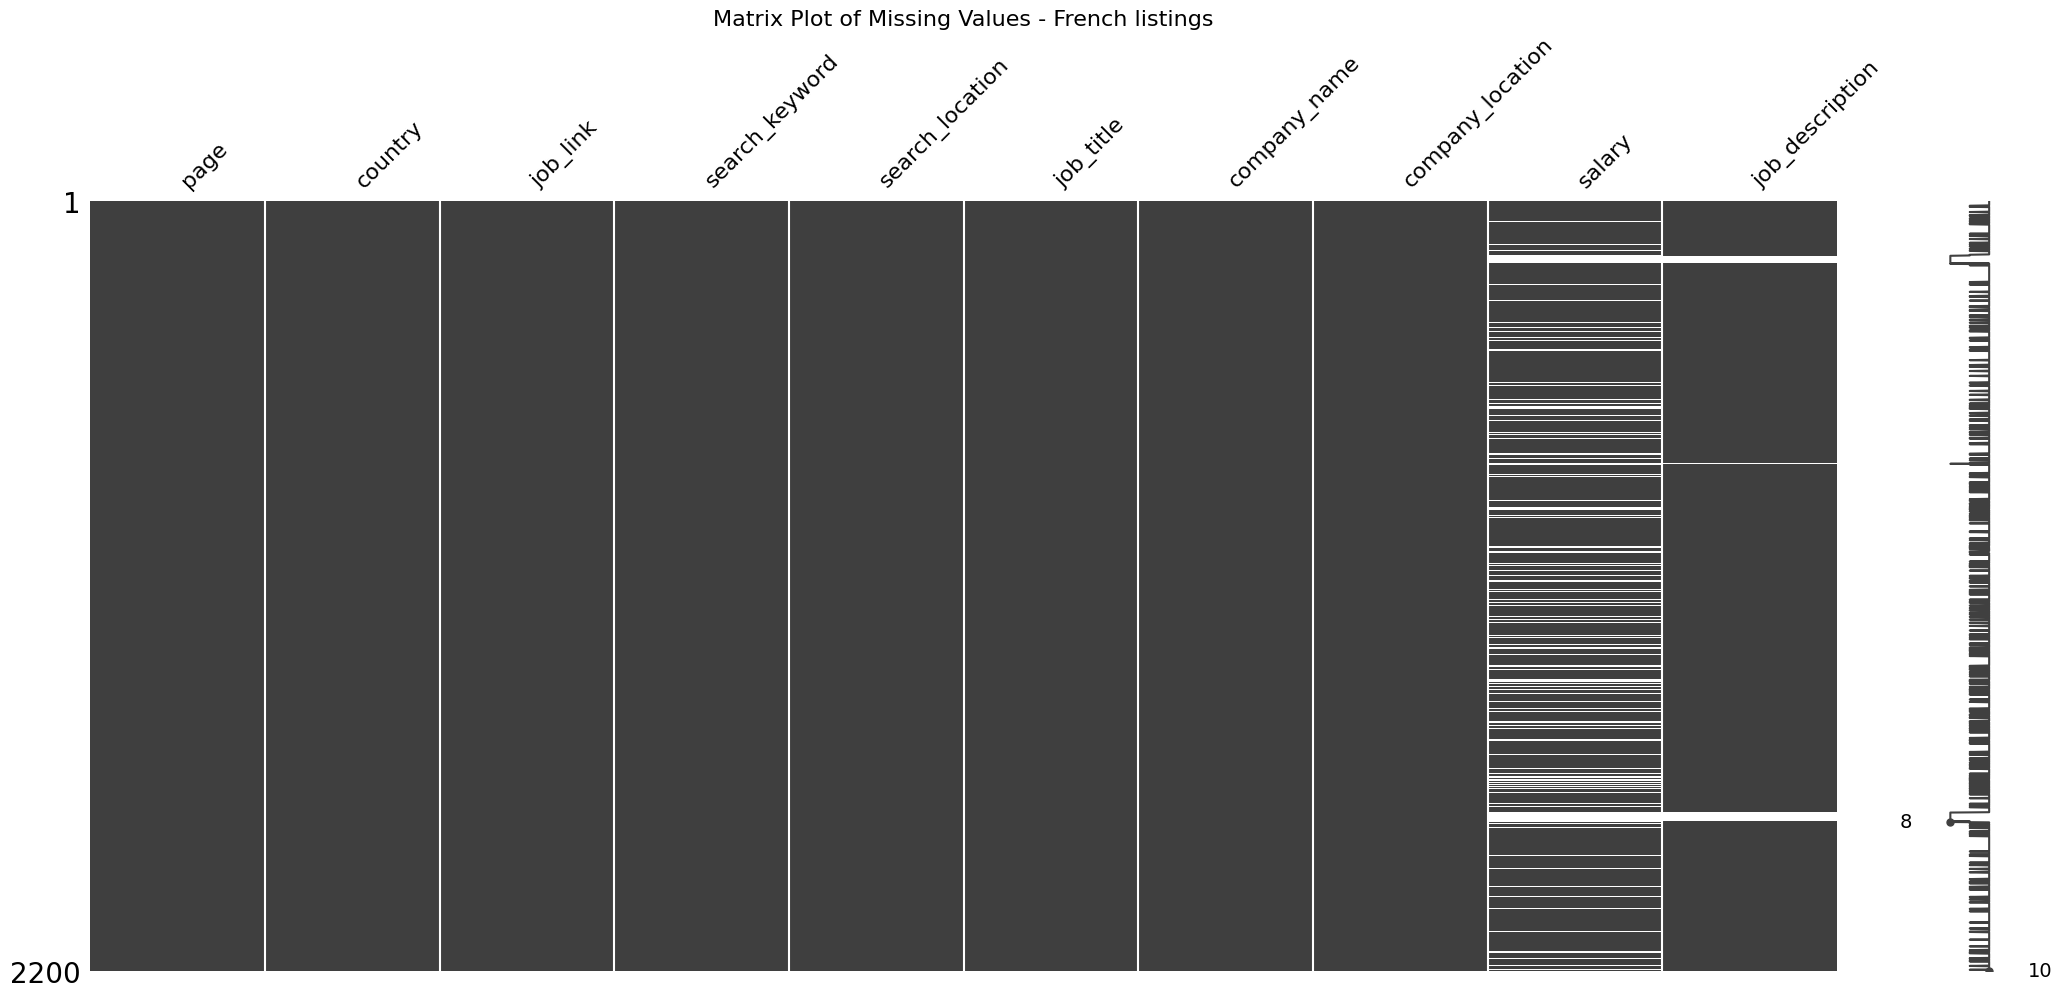

In [15]:
# Visualize missing data patterns 
msno.matrix(dfs['France']) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16) 
plt.show()

In [16]:
# Look into the missing descriptions for French job listings (scraper requests seems to have been blocked here?)
print(dfs['France'].isnull().sum())
#dfs['France'][dfs['France']['job_description'].isnull()].head()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [17]:
# Manual import of missing job description data retrieved directly from URLs 
df_FRA_missing = pd.read_csv(MISSING)
df_FRA_missing.head(3)

page country                                           job_link  \
0    11  France  https://www.indeed.fr/rc/clk?jk=cce878d76d9b30...   
1    11  France  https://www.indeed.fr/rc/clk?jk=56a9127952012f...   
2    11  France  https://www.indeed.fr/rc/clk?jk=f43bcf87ea7bcd...   

  search_keyword search_location                                  job_title  \
0   Data+Analyst      Paris (75)     Business Analyst Customer Data 360 H/F   
1   Data+Analyst      Paris (75)                Senior Data Analyst - Paris   
2   Data+Analyst      Paris (75)  Marketing Business Analyst - (CDD 6 mois)   

     company_name       company_location salary  \
0  AIR FRANCE KLM  Roissy-en-France (95)    CDI   
1         Aircall             Paris (75)    NaN   
2       Deliveroo             Paris (75)    NaN   

                                 job_description_new  
0  Air France KLM recrute :\n\nVous rejoignez l'é...  
1  Paris\nG&A – 13008 - Data /\nFull Time /\nHybr...  
2  Why Deliveroo\n\nOur mission is to transform t...

In [18]:
# Merge French data frames based on the 'job_link' column (serves as unique identifier)
merged_df = pd.merge(dfs['France'], df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
merged_df['job_description'] = merged_df['job_description'].fillna(merged_df['job_description_new'])
merged_df.drop(columns='job_description_new', inplace=True)
dfs['France'] = merged_df
# Verify that there are no missing values in 'job_description'
print(dfs['France'].isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


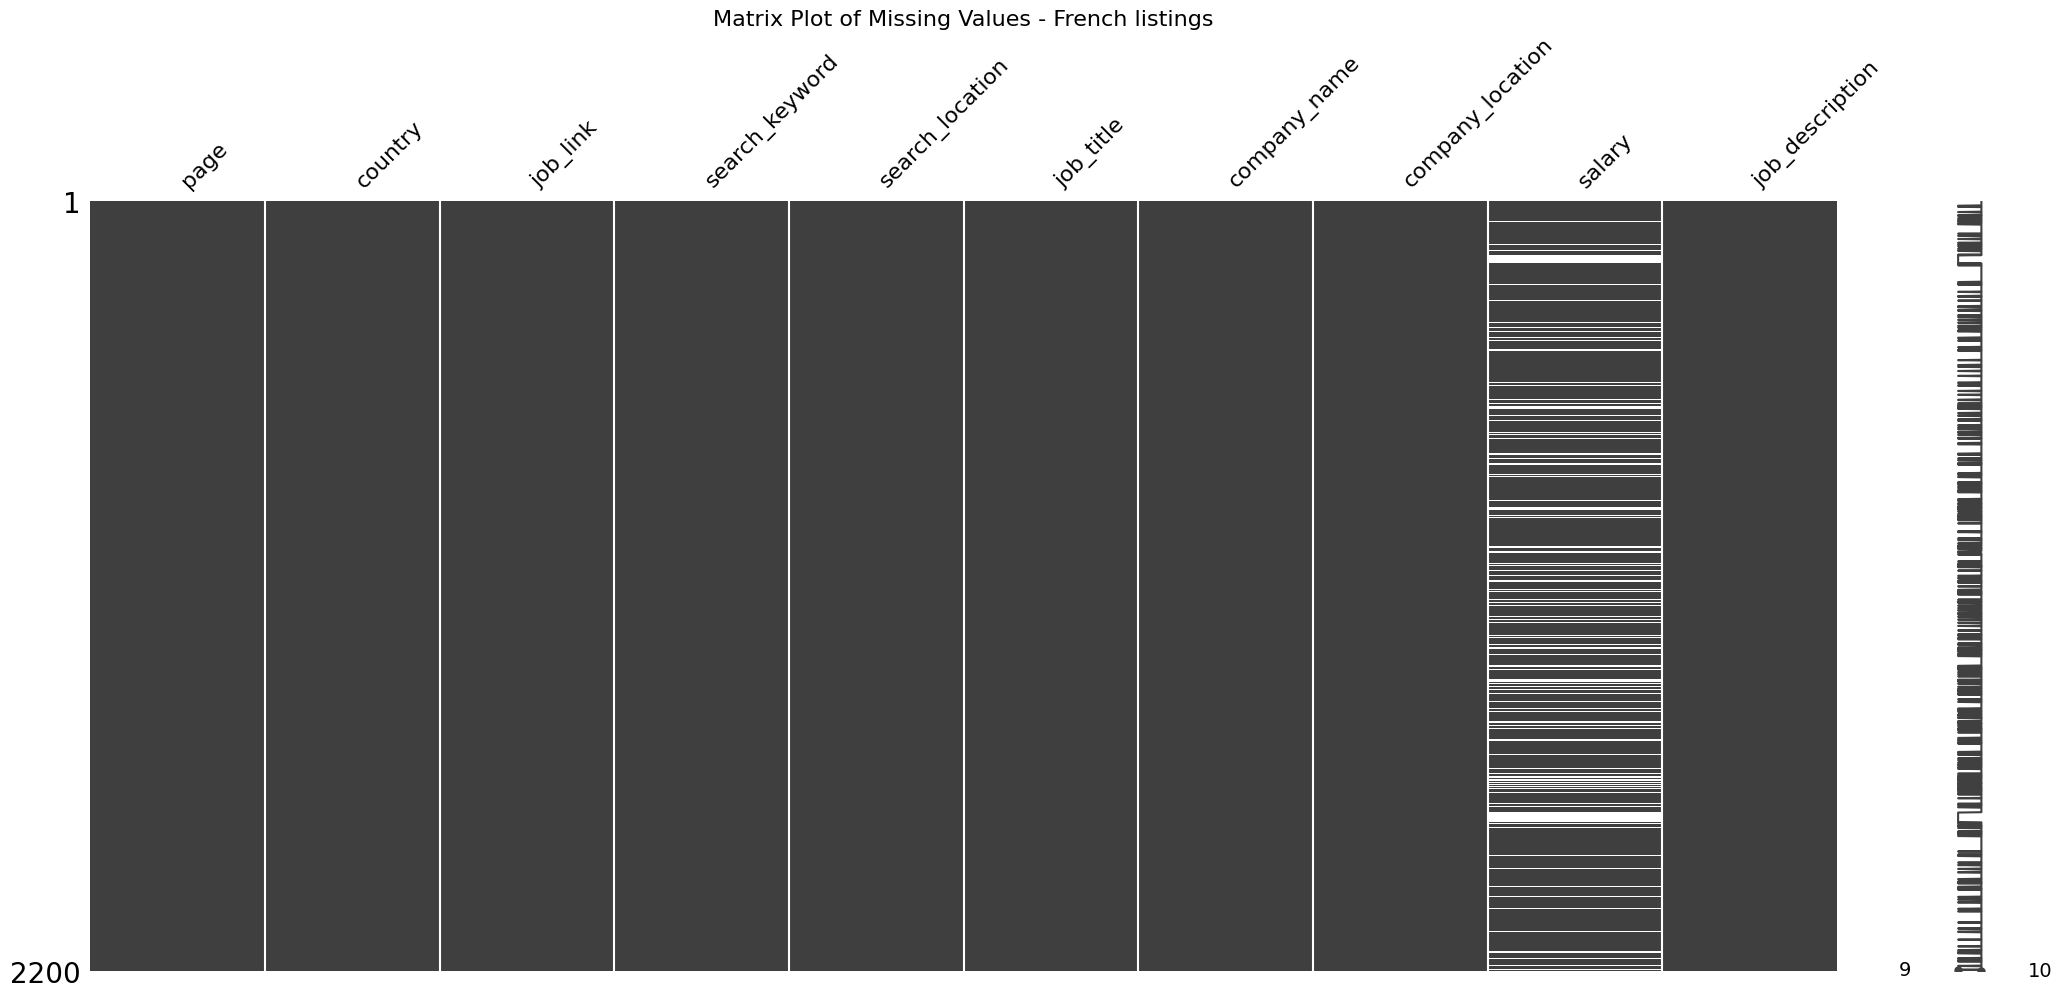

In [19]:
# Now the job_description should not have missing values anymore
msno.matrix(dfs['France'])
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [20]:
# Verify consistent data types after the newly added info in job_description column
dfs['France'] = dfs['France'].astype(DTYPE_DICT)
dfs['France'].dtypes

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object

### Check for duplicates

In [21]:
{mf.check_duplicates(df) for _, df in dfs.items()}

DataFrame with 320 rows has 0 duplicates.
DataFrame with 2200 rows has 0 duplicates.
DataFrame with 769 rows has 0 duplicates.
DataFrame with 1317 rows has 0 duplicates.


{None}

No rows are completely identical, but there are numerous examples of completely identical job descriptions. These are likely _reposts_ (the same job appearing multiple times, just with different unique links). We will remove rows where the job descriptions are identical if there is alsoan identical location and company name (or same urls), but first we have to normalize the job description (see below). 

### Clean columns

In [22]:
# Clean search_keyword and search_location columns: replace '+' with ' ' 
dfs = {country: df.assign(
   search_keyword=pd.Categorical(df['search_keyword'].astype(str).str.replace('+', ' ')),
   search_location=pd.Categorical(df['search_location'].astype(str).str.replace('+', ' '))
) for country, df in dfs.items()}
# Verify that it worked 
dfs['Sweden'].head(3)

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  Data Analyst (Data Visualization)   
1   Data Analyst       Stockholm                       Data Analyst   
2   Data Analyst       Stockholm                       Data Analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) 
 
 Swedium ...  
1  Role: 
 
 Website Performance: Web analyst foc...  
2  Responsibilities 
 
 Website Performance:  Web...

In [23]:
# Clean job_title column 
dfs = {country: df.assign(
   job_title=df['job_title'].str.lower().pipe(
       lambda x: x.str.replace(r'\(?(h/f|f/h)\)?', '', regex=True).str.strip() 
       if country == 'France' else x
   )
) for country, df in dfs.items()}

In [24]:
# Merge all dfs in the dictionary into a single df
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
# Add dates when data was scraped 
df_combined['date'] = np.where(df_combined['country'].isin(['Sweden', 'USA']), pd.to_datetime('2024-09-19'), pd.to_datetime('2024-09-20'))
df_combined.head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title             company_name  \
0                  data analyst (data visualization)  Swedium Global Services   
1                                       data analyst               Deploja AB   
2                                       data analyst      Cubane Solutions AB   
3                                       data analyst                     Sobi   
4  juniora analysts till operations, engineering,...                 Deloitte   

           company_location  salary  \
0  Distansjobb in Stockholm     NaN   
1              169 73 Solna     NaN   
2                 Stockholm  Heltid   
3                 Stockholm  Heltid   
4          113 57 Stockholm  Heltid   

                                     job_description       date  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19  
3  Company Description 
  Statistics show that wo... 2024-09-19  
4  Företagsbeskrivning  
 
 
 Deloitte är en glob... 2024-09-19

In [25]:
# Language identification for job descriptions (can take a little while)
df_combined['language'] = df_combined['job_description'].map(tf.detect_language)

In [26]:
# Assign job_id to each row, instead of using URLs as unique identifiers
df_combined.insert(0, 'job_id', range(1, len(df_combined) + 1))
df_combined.head(3)

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1       2     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   

  search_keyword search_location                          job_title  \
0   Data Analyst       Stockholm  data analyst (data visualization)   
1   Data Analyst       Stockholm                       data analyst   
2   Data Analyst       Stockholm                       data analyst   

              company_name          company_location  salary  \
0  Swedium Global Services  Distansjobb in Stockholm     NaN   
1               Deploja AB              169 73 Solna     NaN   
2      Cubane Solutions AB                 Stockholm  Heltid   

                                     job_description       date language  
0  Data Analyst (Data Visualization) 
 
 Swedium ... 2024-09-19       en  
1  Role: 
 
 Website Performance: Web analyst foc... 2024-09-19       en  
2  Responsibilities 
 
 Website Performance:  Web... 2024-09-19       en

In [27]:
# Normalize text data in job_description
normalized_descriptions = df_combined.groupby('language')[['job_description']].apply(tf.normalize_group)
normalized_descriptions = normalized_descriptions.reset_index()
df_combined = df_combined.reset_index(drop=True)
df_combined = pd.merge(df_combined, normalized_descriptions[['language', 'job_description', 'job_description_norm']], on=['language', 'job_description'], how='left')

Normalizing text for language group: en
Normalizing text for language group: fr
Normalizing text for language group: it
Normalizing text for language group: sv


In [28]:
df_combined[['job_description', 'job_description_norm']].head()

job_description  \
0  Data Analyst (Data Visualization) 
 
 Swedium ...   
1  Data Analyst (Data Visualization) 
 
 Swedium ...   
2  Role: 
 
 Website Performance: Web analyst foc...   
3  Role: 
 
 Website Performance: Web analyst foc...   
4  Responsibilities 
 
 Website Performance:  Web...   

                                job_description_norm  
0  data analyst data visualization swedium global...  
1  data analyst data visualization swedium global...  
2  role website performance web analyst focus spe...  
3  role website performance web analyst focus spe...  
4  responsibility website performance web analyst...

In [29]:
# Now remove duplicates based on normalized job description. 
# Identify rows with same job description, company, and location (or unique url) and keep only the latest job listing
df_combined = mf.remove_duplicates_jobdesc(df_combined)

Initial rows: 10094
Rows after removing exact duplicates: 3028
Final rows: 3028
Total duplicates removed: 7066


In [30]:
# Check new row numbers after removing duplicates
row_counts = df_combined.groupby('country').size()
print("\nRow counts:\n", row_counts)


Row counts:
 country
France    1363
Italy      567
Sweden     263
USA        835
dtype: int64


In [31]:
# Map language codes to full language names 
df_combined['language'] = df_combined['language'].map(LANGUAGE_MAP)

In [32]:
df_combined.head(3)

job_id  page country                                           job_link  \
6        4     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
13       8     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
20      12     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

   search_keyword search_location  \
6    Data Analyst       Stockholm   
13   Data Analyst       Stockholm   
20   Data Analyst       Stockholm   

                                            job_title  \
6                                        data analyst   
13  fraud & data analyst to the fraud strategy & a...   
20                                       data analyst   

                 company_name                 company_location  salary  \
6                        Sobi                        Stockholm  Heltid   
13         Entercard Group AB                 111 39 Stockholm     NaN   
20  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                      job_description       date language  \
6   Company Description 
  Statistics show that wo... 2024-09-19  english   
13  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
20  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                 job_description_norm  
6   company description statistic show woman under...  
13  entercard entercard one scandinavia’s leading ...  
20  star stable entertainment upon time 2011 found...

In [33]:
# Clean and parse location column
countries = ['Sweden', 'France', 'Italy', 'USA']
location_dfs = [mf.standardize_locations(
    df_combined[df_combined['country']==country], 
    'company_location',
    country) 
    for country in countries]
location_df = pd.concat(location_dfs)
df_combined = df_combined.merge(location_df, on=['job_id', 'company_location'], how='left')
df_combined = df_combined.drop('country_x', axis=1).rename(columns={'country_y': 'country'})

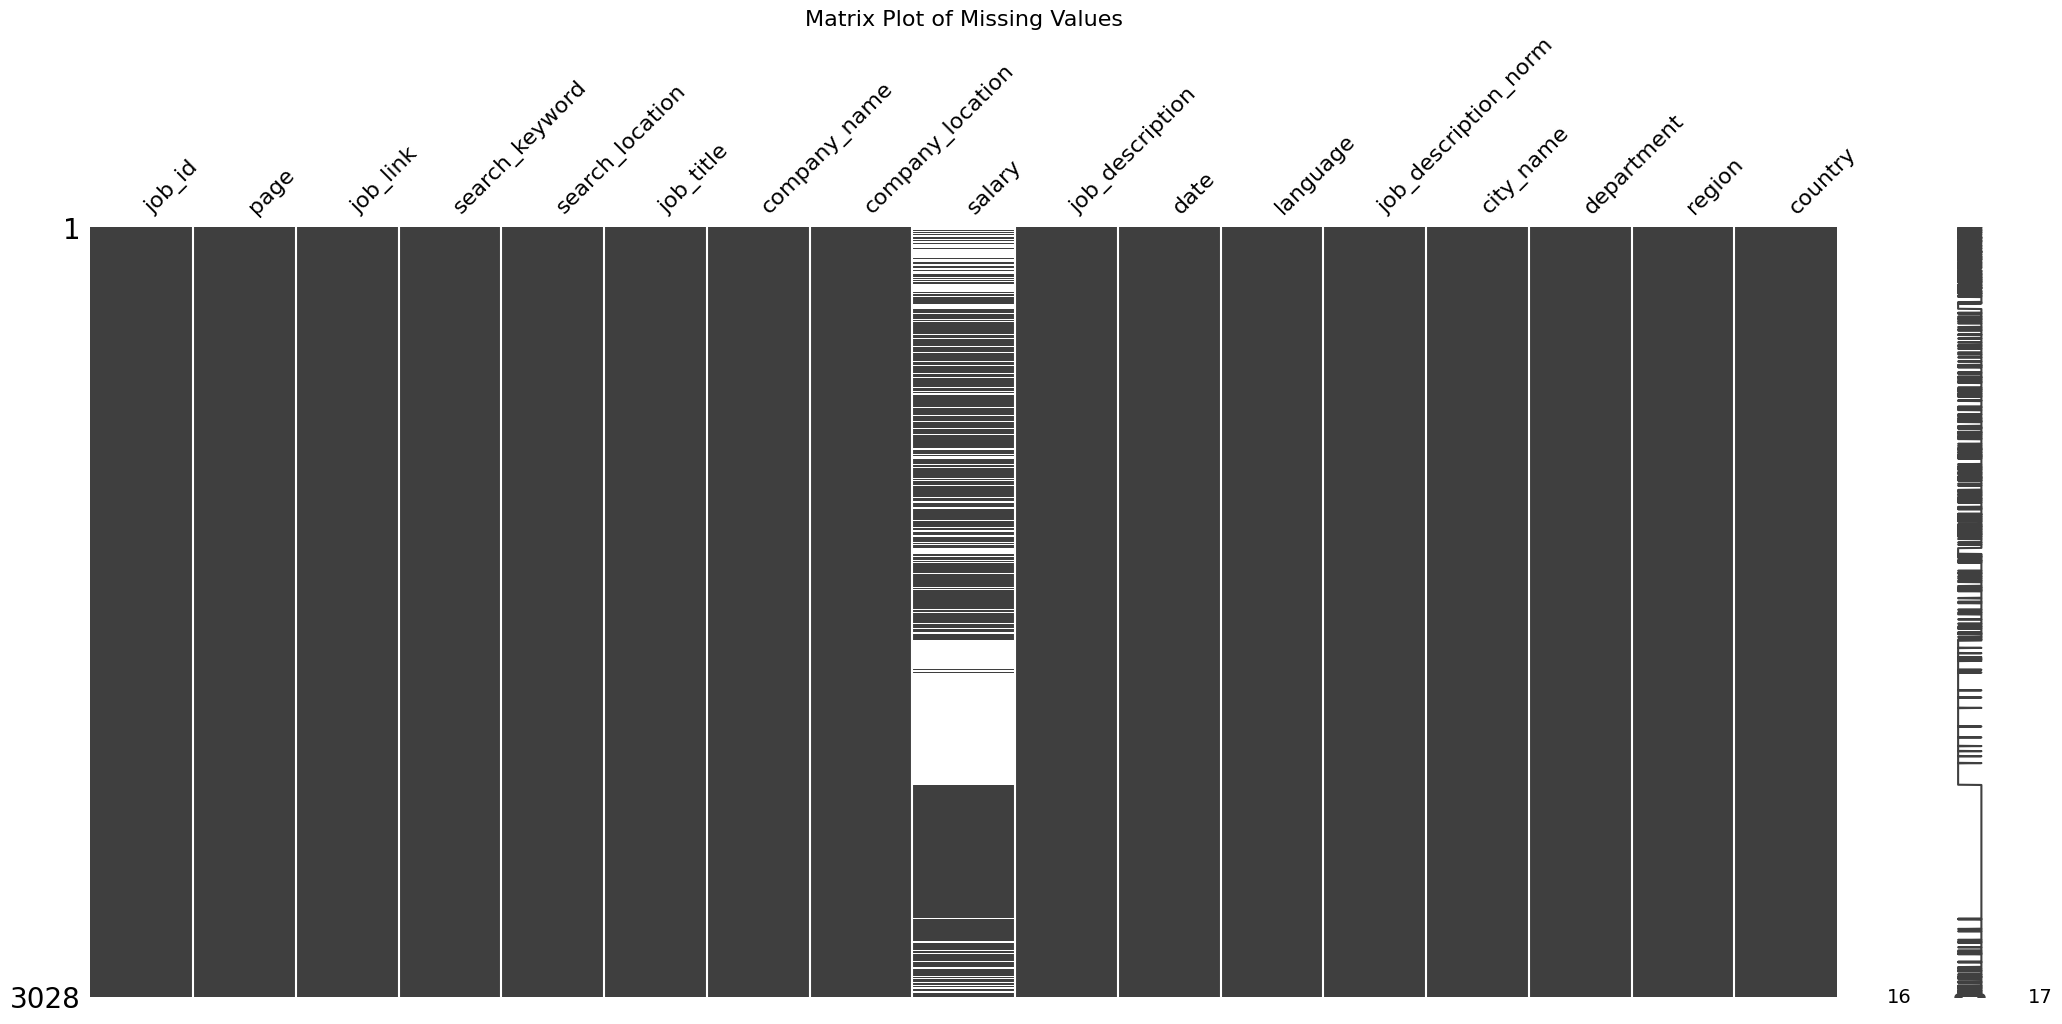

In [34]:
# Just verify that this didn't introduce new null values
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values', fontsize=16)  
plt.show()

In [35]:
# Verify data types for new columns (compare with DTYPE_DICT)
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
city_name                       object
department                      object
region                          object
country                         object
dtype: object

In [36]:
df_combined = df_combined.astype({
    'language': 'category',
    'job_description_norm': 'string',
    'city_name' : 'string',  
    'country' : 'category' 
})
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
dtype: object

In [37]:
df_combined.head(3)

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden

## Descriptive statistics

In [38]:
# Describe (numerical) columns  
mask = df_combined['country'] == 'Sweden'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    263.0  263.0                                                263   
unique     NaN    NaN                                                263   
top        NaN    NaN  https://se.indeed.com/rc/clk?jk=132e951bba6ac1...   
freq       NaN    NaN                                                  1   

        search_keyword search_location         job_title         company_name  \
count              263             263               263                  263   
unique               4               3               194                  198   
top     Data Scientist       Stockholm  systemutvecklare  Cubane Solutions AB   
freq               131             186                19                    7   

       company_location  salary  \
count               263     113   
unique               88      10   
top           Stockholm  Heltid   
freq                 69      58   

                                          job_description date language  \
count                                                 263  263      263   
unique                                                263  NaN        2   
top     We are hiring a GIS Analyst   Nordregio is exp...  NaN  english   
freq                                                    1  NaN      133   

                                     job_description_norm  city_name  \
count                                                 263        263   
unique                                                263         15   
top     hiring gi analyst nordregio expanding gi team ...  Stockholm   
freq                                                    1        157   

                department     region country  
count                  263        263     263  
unique                   3          3       1  
top     01 - Stockholm län  Stockholm  Sweden  
freq                   186        186     263

In [39]:
# Describe categorical columns  
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
systemutvecklare                                 19
data analyst                                     13
data scientist                                   13
business analyst                                  8
senior data scientist                             5
                                                 ..
pricing coordinator                               1
senior business intelligence analyst              1
senior logistics analyst                          1
powerbi utvecklare                                1
production analytics lead [game intelligence]     1
Name: count, Length: 194, dtype: Int64

Value counts for column: company_name
company_name
Cubane Solutions AB      7
Deploja AB               6
JobBusters AB            4
Volvo Group              4
TEN10 AB                 4
                        ..
Techster Solutions       1
JAS Worldwide            1
Wolters Kluwer           1
Techster Solutions AB    1
Ubisoft               

### Preliminary observations, Swedish job listings:
- __Most frequent job title__: Systemutvecklare.
- __Most frequent company__: Cubane Solutions AB. 
- __Company location__: Stockholm primarily. 
- __Salary ranges__: Few numerical values.

In [40]:
mask = df_combined['country'] == 'France'
df_combined[mask].describe(include='all').head(4)

job_id    page                                           job_link  \
count   1363.0  1363.0                                               1363   
unique     NaN     NaN                                               1363   
top        NaN     NaN  https://www.indeed.fr/rc/clk?jk=87348216f5b0a7...   
freq       NaN     NaN                                                  1   

         search_keyword search_location     job_title company_name  \
count              1363            1363          1363         1363   
unique                4               3          1151          718   
top     Product Analyst      Paris (75)  data analyst          AXA   
freq                501            1198            38           38   

       company_location       salary  \
count              1363         1107   
unique              256          164   
top          Paris (75)  Temps plein   
freq                380          298   

                                          job_description  date language  \
count                                                1363  1363     1363   
unique                                               1350   NaN        2   
top     Qui sommes-nous? \n \n Artefact est une nouvel...   NaN   french   
freq                                                    2   NaN      982   

                                     job_description_norm city_name  \
count                                                1363      1363   
unique                                               1341        95   
top     line of service advisory industry/sector speci...     Paris   
freq                                                    2       688   

        department         region country  
count         1363           1363    1363  
unique          10              3       1  
top     75 - Paris  Île-de-France  France  
freq           691           1199    1363

In [41]:
af.desc_categorical(df_combined[mask]) 

Value counts for column: job_title
job_title
data analyst                                                                                            38
data scientist                                                                                          32
business analyst                                                                                        13
data analyst intern                                                                                      8
business analyst data                                                                                    7
                                                                                                        ..
apprenticeship - business data analyst - september 2024 - (m/f)                                          1
alternance - assistant data analyst                                                                      1
business analyst customer data 360 & crm                                                           

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job title__: Data Analyst. 
- __Most frequently mentioned company__: AXA. 
- __Company location__: Most in Paris. 
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [42]:
mask = df_combined['country'] == 'Italy'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    567.0  567.0                                                567   
unique     NaN    NaN                                                567   
top        NaN    NaN  https://it.indeed.com/rc/clk?jk=46de7544ab716b...   
freq       NaN    NaN                                                  1   

       search_keyword    search_location       job_title  \
count             567                567             567   
unique              4                  3             451   
top      Data Analyst  Milano, Lombardia  data scientist   
freq              260                388              33   

                               company_name   company_location  \
count                                   567                567   
unique                                  309                 96   
top     BIP - Business Integration Partners  Milano, Lombardia   
freq                                     30                148   

                 salary                                    job_description  \
count                17                                                567   
unique               14                                                552   
top     1.000 € al mese  NTT DATA, Trusted Global Innovator, è tra i pr...   
freq                  3                                                  3   

       date language                               job_description_norm  \
count   567      567                                                567   
unique  NaN        3                                                553   
top     NaN  italian  ntt data trusted global innovator è tra princi...   
freq    NaN      314                                                  3   

       city_name   department     region country  
count        567          567        567     567  
unique        27            6          3       1  
top       Milano  MI - Milano  Lombardia   Italy  
freq         341          380        388     567

In [43]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data scientist                                 33
data analyst                                   16
business analyst                               11
senior data analyst                             6
cyber security analyst                          4
                                               ..
senior business analyst                         1
data scientist middle                           1
bi engineer                                     1
junior business analyst autohero                1
kpmg open platform | abap developer analyst     1
Name: count, Length: 451, dtype: Int64

Value counts for column: company_name
company_name
BIP - Business Integration Partners    30
NTT Data                               16
KPMG                                   14
DXC Technology                         11
Euronext                               10
                                       ..
Crédit Agricole Assurances              1
EF Solare Italia    

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job title__: Data Scientist.
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. 
- __Salary ranges__: Few numerical entries. 

In [44]:
mask = df_combined['country']=='USA'
df_combined[mask].describe(include='all').head(4)

job_id   page                                           job_link  \
count    835.0  835.0                                                835   
unique     NaN    NaN                                                835   
top        NaN    NaN  https://www.indeed.com/rc/clk?jk=274ddb9b95715...   
freq       NaN    NaN                                                  1   

        search_keyword search_location     job_title company_name  \
count              835             835           835          835   
unique               4               3           737          470   
top     Data Scientist    New York, NY  data analyst         Citi   
freq               264             487            12           27   

       company_location     salary  \
count               835        789   
unique              185        524   
top        New York, NY  Full-time   
freq                179        149   

                                          job_description date language  \
count                                                 835  835      835   
unique                                                823  NaN        1   
top     Wavemaker positively provokes growth for clien...  NaN  english   
freq                                                    2  NaN      835   

                                     job_description_norm city_name  \
count                                                 835       835   
unique                                                823        42   
top     wavemaker positively provokes growth client re...  New York   
freq                                                    2       419   

                 department     region country  
count                   835        835     835  
unique                    5          3       1  
top     NY - New York State  Northeast     USA  
freq                    450        487     835

In [45]:
af.desc_categorical(df_combined[mask])

Value counts for column: job_title
job_title
data analyst                                                   12
business analyst                                               11
senior machine learning engineer                                9
senior data scientist                                           8
senior business analyst                                         5
                                                               ..
sales analyst                                                   1
healthcare claims api/edi business analyst (local) (hybrid)     1
ecommerce analyst                                               1
senior financial analyst, north america commercial finance      1
business analyst, performance internal controls                 1
Name: count, Length: 737, dtype: Int64

Value counts for column: company_name
company_name
Citi                        27
JPMorganChase               22
Google                      13
Amazon.com Services LLC     11
PRICE WATERHOU

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job title__: Data Analyst. But titles need to be looked at in detail to get the full picture (there are terms such as 'senior' that will result in separate categories when counting values)
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to look into the numerical entries only.

## Feature engineering 

### Retrieve numeric values for salary

In [46]:
df_combined.head()

job_id  page                                           job_link  \
0       4     1  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       8     1  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2      12     1  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3      14     1  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4      16     2  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm  city_name  \
0  company description statistic show woman under...  Stockholm   
1  entercard entercard one scandinavia’s leading ...  Stockholm   
2  star stable entertainment upon time 2011 found...  Stockholm   
3  baby journey lanserades hösten 2020 app riktar...  Stockholm   
4  wsp global consulting firm assisting public pr...  Stockholm   

           department     region country  
0  01 - Stockholm län  Stockholm  Sweden  
1  01 - Stockholm län  Stockholm  Sweden  
2  01 - Stockholm län  Stockholm  Sweden  
3  01 - Stockholm län  Stockholm  Sweden  
4  01 - Stockholm län  Stockholm  Sweden

In [47]:
# Use like this:
df_combined = sf.update_salary_data(df_combined)

******************************
Retrieving salaries for Sweden:
Languages: ['english', 'swedish']
     min_salary  max_salary currency
110     40000.0     80000.0      sek
221     15000.0     20000.0      sek
Rows changed for Sweden: 263. Original rows retrieved: 263
******************************

******************************
Retrieving salaries for France:
Languages: ['french', 'english']
      min_salary  max_salary currency
265        721.0      1747.0     euro
285     38452.41     50000.0     euro
290        800.0      1500.0     euro
294      45000.0     55000.0     euro
296      33000.0     33000.0     euro
...          ...         ...      ...
1604     35000.0     35000.0     euro
1606     35000.0     45000.0     euro
1615     42000.0     48000.0     euro
1617     45000.0     55000.0     euro
1618     40000.0     55000.0     euro

[155 rows x 3 columns]
Rows changed for France: 1363. Original rows retrieved: 1363
******************************

******************************
R

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_id                3028 non-null   int64         
 1   page                  3028 non-null   int64         
 2   job_link              3028 non-null   object        
 3   search_keyword        3028 non-null   category      
 4   search_location       3028 non-null   object        
 5   job_title             3028 non-null   string        
 6   company_name          3028 non-null   string        
 7   company_location      3028 non-null   object        
 8   salary                2026 non-null   object        
 9   job_description       3028 non-null   string        
 10  date                  3028 non-null   datetime64[ns]
 11  language              3028 non-null   category      
 12  job_description_norm  3028 non-null   string        
 13  city_name         

In [49]:
print('Sample of updated data:')
print(df_combined[df_combined['salary'].notna()][['country', 'salary', 'min_salary', 'max_salary', 'currency', 'time_unit']].sample(5))

Sample of updated data:
     country                                    salary  min_salary  \
1556  France                               Temps plein        <NA>   
2276     USA  $63,000 - $110,000 a year  -   Full-time     63000.0   
420   France                                     Stage        <NA>   
1310  France     45 000 € par an  -   CDI, Temps plein     45000.0   
2040   Italy                         75.000 € all'anno     75000.0   

      max_salary currency time_unit  
1556        <NA>     <NA>      <NA>  
2276    110000.0   dollar      year  
420         <NA>     <NA>      <NA>  
1310     45000.0     euro      year  
2040     75000.0     euro      year  


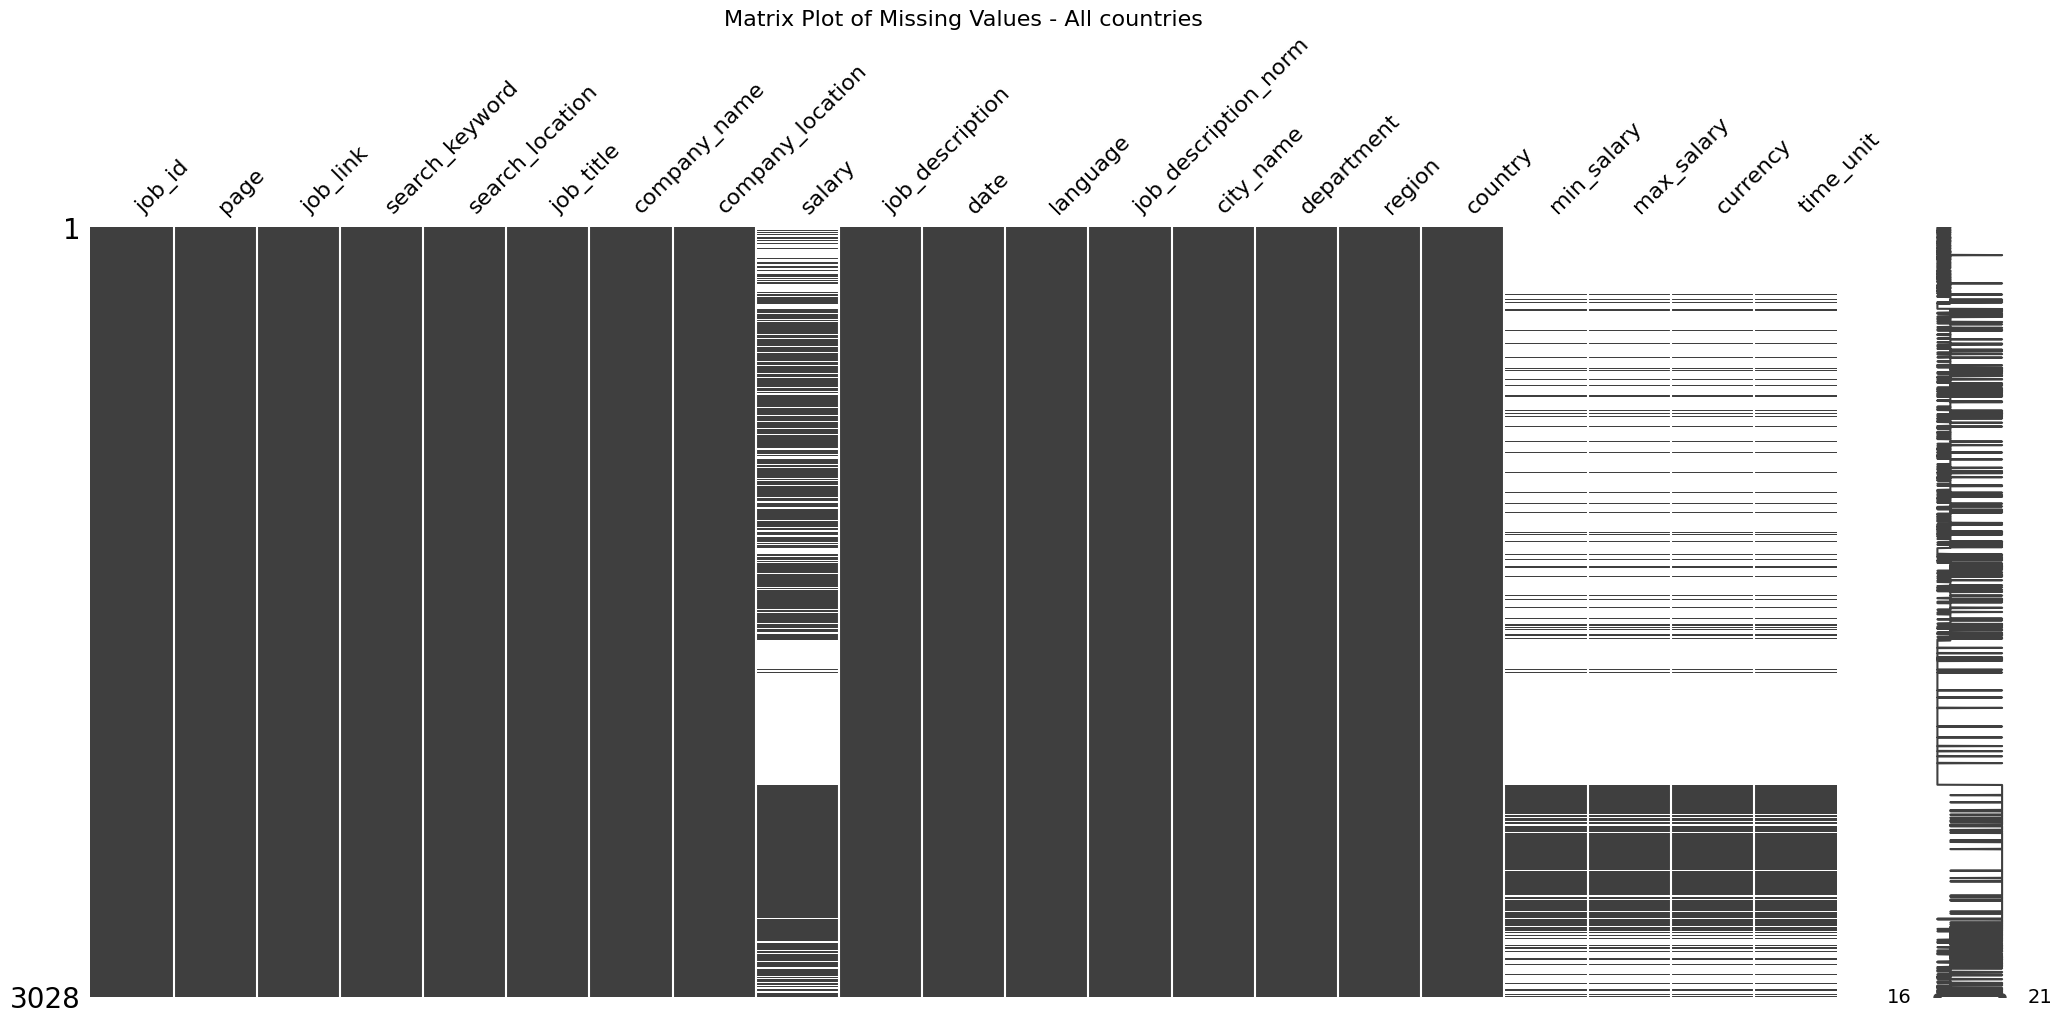

In [50]:
# Check missing values now 
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values - All countries', fontsize=16)  
plt.show()

Some salaries are disappearing when going into numeric mode, but that is just because they are not containing numerical values!

In [51]:
# Make sure data types are correct again
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                string[python]
time_unit               string[python]
dtype: object

In [52]:
# Get monthly salary for all rows 
df_combined['min_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'min_salary', 'time_unit')
df_combined['max_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'max_salary', 'time_unit')
df_combined[df_combined['min_salary_monthly'].notna()].head(3)

job_id  page                                           job_link  \
110     145     1  https://se.indeed.com/rc/clk?jk=044708271c5bec...   
221     279     1  https://se.indeed.com/rc/clk?jk=3daeeaf597909e...   
265     351     3  https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...   

      search_keyword search_location  \
110   Data Scientist        Göteborg   
221  Product Analyst           Malmö   
265     Data Analyst      Paris (75)   

                                             job_title  \
110  senior data scientist som vill skapa framtida ...   
221  swedish customer support analyst - bulgaria ba...   
265                alternance - assistant data analyst   

                   company_name                              company_location  \
110       Artificial Collective                               413 27 Göteborg   
221  TELUS International Europe                                          Lund   
265                  CMI France  Télétravail partiel à 92300 Levallois-Perret   

                                                salary  \
110                    40 000SEK - 80 000SEK per månad   
221  15 000SEK - 20 000SEK per månad  -   Tillsvida...   
265        De 721 € à 1 747 € par mois  -   Alternance   

                                       job_description  ...         city_name  \
110  Hej!  
 Är du redo att göra verklig skillnad m...  ...          Göteborg   
221  *Please note that the position is based in Sof...  ...              Lund   
265  CMI Media, la régie publicitaire du groupe CMI...  ...  Levallois-Perret   

                    department           region country min_salary max_salary  \
110  14 - Västra Götalands län  Västra Götaland  Sweden    40000.0    80000.0   
221             12 - Skåne län            Skåne  Sweden    15000.0    20000.0   
265        92 - Hauts-de-Seine    Île-de-France  France      721.0     1747.0   

    currency  time_unit  min_salary_monthly max_salary_monthly  
110      sek      month             40000.0            80000.0  
221      sek      month             15000.0            20000.0  
265     euro      month               721.0             1747.0  

[3 rows x 23 columns]

In [53]:
# Convert salary to same currency using exchange rate
df_combined = sf.process_salaries(df_combined)

Exchange rates: {'SEK': 0.0866, 'USD': 0.95311, 'EUR': 1}

Debug Information:
Currency mapping: {'dollar': 0.95311, 'euro': 1, 'sek': 0.0866}

Currency value counts: currency
<NA>      2229
dollar     625
euro       172
sek          2
Name: count, dtype: Int64

Sample conversions for each currency:

DOLLAR conversions:
     currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
2193   dollar            5647.595              6250.0           5382.77927   
2194   dollar              5000.0         9166.666667              4765.55   

     max_salary_month_EUR  
2193            5956.9375  
2194          8736.841667  

EURO conversions:
    currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
265     euro               721.0              1747.0                721.0   
285     euro           3204.3675         4166.666667            3204.3675   

    max_salary_month_EUR  
265               1747.0  
285          4166.666667  

SEK conversions:
    curren

In [54]:
# Verify correct data types 
# Convert currency, time_unit into categorical 
df_combined[['currency', 'time_unit']] = df_combined[['currency', 'time_unit']].astype('category')
df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']] = df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']].astype('Float64')
df_combined.dtypes

job_id                           int64
page                             int64
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
city_name               string[python]
department                      object
region                          object
country                       category
min_salary                     Float64
max_salary                     Float64
currency                      category
time_unit                     category
min_salary_monthly             Float64
max_salary_monthly             Float64
min_salary_month_EUR           Float64
max_salary_month_EUR           Float64
dtype: object

### Detect keywords : overall

In [55]:
# Extract keywords for countries 
common_keywords = {country: tf.extract_keywords(df_combined, country) 
                  for country in ['Sweden', 'France', 'Italy', 'USA']}

Rows for Sweden: 263
Rows for France: 1363
Rows for Italy: 567
Rows for USA: 835


In [134]:
# Merge top 10 to get a rough idea
df = pd.DataFrame([(country, word, count) for country, keywords in common_keywords.items() for word, count in keywords[0]], columns=['country', 'word', 'count'])
df['word'] = df['word'].replace(KEYWORD_MAP)
totals = df.groupby('word')['count'].sum().sort_values(ascending=False)
totals

word
data           19353
business        9241
team            8529
experience      7147
work            5352
product         3958
skill           3392
client          2852
management      2699
plus            2393
solution        2330
including       2068
mission         2043
opportunity     1919
service         1717
conoscenza       984
Name: count, dtype: int64

### Detect keywords : technical skills

In [56]:
technical_skills = pd.concat([
    af.count_keywords(df_combined, country, 'job_description_norm')
    for country in df_combined['country'].unique()
], ignore_index=True).sort_values('Count', ascending=False)

In [57]:
technical_skills.head()

Category   Keyword  Search Keyword Country  Count
154                        BI Tools  power bi      BI Analyst  France    254
773  Programming Languages/Software    python  Data Scientist     USA    176
380  Programming Languages/Software       sql      BI Analyst  France    167
169                        BI Tools   tableau      BI Analyst  France    161
341  Programming Languages/Software     excel      BI Analyst  France    135

In [58]:
# Relative frequency of keyword for resp. country and search keyword
skills_country = af.calculate_country_frequencies(technical_skills, df_combined)

# View top skills for each country
top_skills_by_country = skills_country.sort_values(['Country', 'Frequency'], ascending=[True, False]).groupby('Country').head(10)
top_skills_by_country

Country                        Category      Keyword  Count  Total_jobs  \
82   France  Programming Languages/Software          sql    461        1363   
68   France  Programming Languages/Software          c++    450        1363   
77   France  Programming Languages/Software       python    392        1363   
69   France  Programming Languages/Software        excel    357        1363   
3    France                        BI Tools     power bi    317        1363   
7    France                        BI Tools      tableau    306        1363   
78   France  Programming Languages/Software            r    191        1363   
20   France                 Cloud Computing        azure    110        1363   
19   France                 Cloud Computing          aws     98        1363   
28   France             Collaboration Tools         jira     92        1363   
160   Italy  Programming Languages/Software       python    207         567   
154   Italy  Programming Languages/Software        excel    202         567   
166   Italy  Programming Languages/Software          sql    182         567   
129   Italy          Data Science Platforms  informatica    132         567   
161   Italy  Programming Languages/Software            r    116         567   
93    Italy                        BI Tools     power bi     81         567   
97    Italy                        BI Tools      tableau     75         567   
153   Italy  Programming Languages/Software          c++     72         567   
109   Italy                 Cloud Computing          aws     64         567   
110   Italy                 Cloud Computing        azure     55         567   
230  Sweden  Programming Languages/Software          sql     98         263   
225  Sweden  Programming Languages/Software       python     79         263   
226  Sweden  Programming Languages/Software            r     48         263   
217  Sweden  Programming Languages/Software          c++     46         263   
190  Sweden                 Cloud Computing        azure     45         263   
176  Sweden                        BI Tools     power bi     38         263   
180  Sweden                        BI Tools      tableau     37         263   
220  Sweden  Programming Languages/Software         java     37         263   
218  Sweden  Programming Languages/Software        excel     34         263   
189  Sweden                 Cloud Computing          aws     30         263   
320     USA  Programming Languages/Software          sql    340         835   
314     USA  Programming Languages/Software       python    304         835   
307     USA  Programming Languages/Software        excel    279         835   
247     USA                        BI Tools      tableau    156         835   
315     USA  Programming Languages/Software            r    152         835   
256     USA                 Cloud Computing          aws    107         835   
308     USA  Programming Languages/Software           go    105         835   
306     USA  Programming Languages/Software          c++    100         835   
244     USA                        BI Tools     power bi     96         835   
257     USA                 Cloud Computing        azure     85         835   

     Frequency  
82       33.82  
68       33.02  
77       28.76  
69       26.19  
3        23.26  
7        22.45  
78       14.01  
20        8.07  
19        7.19  
28        6.75  
160      36.51  
154      35.63  
166      32.10  
129      23.28  
161      20.46  
93       14.29  
97       13.23  
153      12.70  
109      11.29  
110       9.70  
230      37.26  
225      30.04  
226      18.25  
217      17.49  
190      17.11  
176      14.45  
180      14.07  
220      14.07  
218      12.93  
189      11.41  
320      40.72  
314      36.41  
307      33.41  
247      18.68  
315      18.20  
256      12.81  
308      12.57  
306      11.98  
244      11.50  
257      10.18

In [59]:
# Top 10 keywords overall
global_skills = af.calculate_global_frequencies(technical_skills, df_combined)
global_skills.head(10)

Category   Keyword  Count  Frequency  Total_jobs
96  Programming Languages/Software       sql   1081      35.70        3028
90  Programming Languages/Software    python    982      32.43        3028
82  Programming Languages/Software     excel    872      28.80        3028
81  Programming Languages/Software       c++    668      22.06        3028
7                         BI Tools   tableau    574      18.96        3028
3                         BI Tools  power bi    532      17.57        3028
91  Programming Languages/Software         r    507      16.74        3028
21                 Cloud Computing       aws    299       9.87        3028
22                 Cloud Computing     azure    295       9.74        3028
83  Programming Languages/Software        go    222       7.33        3028

In [60]:
skills_by_role = af.calculate_frequencies_by_search_keyword(technical_skills, df_combined)

# Get top 10 skills for each search keyword
top_skills_by_role = skills_by_role.groupby('Search Keyword', observed=True).head(10)
top_skills_by_role

Search Keyword                        Category      Keyword  Count  \
3         BI Analyst                        BI Tools     power bi    407   
69        BI Analyst  Programming Languages/Software          sql    372   
58        BI Analyst  Programming Languages/Software        excel    306   
7         BI Analyst                        BI Tools      tableau    270   
65        BI Analyst  Programming Languages/Software       python    243   
57        BI Analyst  Programming Languages/Software          c++    162   
66        BI Analyst  Programming Languages/Software            r    123   
17        BI Analyst                 Cloud Computing        azure     90   
16        BI Analyst                 Cloud Computing          aws     75   
5         BI Analyst                        BI Tools          sap     68   
134     Data Analyst  Programming Languages/Software        excel    318   
146     Data Analyst  Programming Languages/Software          sql    246   
133     Data Analyst  Programming Languages/Software          c++    175   
84      Data Analyst                        BI Tools      tableau    157   
140     Data Analyst  Programming Languages/Software       python    155   
141     Data Analyst  Programming Languages/Software            r    119   
80      Data Analyst                        BI Tools     power bi     58   
82      Data Analyst                        BI Tools          sap     50   
116     Data Analyst          Data Science Platforms  informatica     43   
111     Data Analyst                            DBMS       oracle     42   
231   Data Scientist  Programming Languages/Software       python    469   
237   Data Scientist  Programming Languages/Software          sql    309   
232   Data Scientist  Programming Languages/Software            r    195   
223   Data Scientist  Programming Languages/Software          c++    184   
175   Data Scientist                 Cloud Computing          aws    154   
176   Data Scientist                 Cloud Computing        azure    140   
215   Data Scientist     ML and Statistical Modeling      pytorch    121   
219   Data Scientist     ML and Statistical Modeling   tensorflow    120   
226   Data Scientist  Programming Languages/Software         java    109   
173   Data Scientist           Big Data Technologies        spark    108   
308  Product Analyst  Programming Languages/Software        excel    163   
321  Product Analyst  Programming Languages/Software          sql    154   
307  Product Analyst  Programming Languages/Software          c++    147   
316  Product Analyst  Programming Languages/Software       python    115   
309  Product Analyst  Programming Languages/Software           go     75   
276  Product Analyst             Collaboration Tools         jira     72   
317  Product Analyst  Programming Languages/Software            r     70   
256  Product Analyst                        BI Tools      tableau     44   
267  Product Analyst                 Cloud Computing          aws     43   
275  Product Analyst             Collaboration Tools   confluence     42   

     Total_jobs  Frequency  
3           762      53.41  
69          762      48.82  
58          762      40.16  
7           762      35.43  
65          762      31.89  
57          762      21.26  
66          762      16.14  
17          762      11.81  
16          762       9.84  
5           762       8.92  
134         801      39.70  
146         801      30.71  
133         801      21.85  
84          801      19.60  
140         801      19.35  
141         801      14.86  
80          801       7.24  
82          801       6.24  
116         801       5.37  
111         801       5.24  
231         745      62.95  
237         745      41.48  
232         745      26.17  
223         745      24.70  
175         745      20.67  
176         745      18.79  
215         745      16.24  
219         745      16.11  
226         745      14.63  
173         745    

### Detect keywords : interview process

In [61]:
CONTEXT_PATTERNS

{'english': 'recruitment process|interview process',
 'french': "processus de recrutement|processus d\\'entretien",
 'italian': 'processo di reclutamento|colloquio|selezione del personale',
 'swedish': 'rekryteringsprocess|intervjuprocess'}

In [62]:
# Extract interview information
interview_info_df, interview_flags_df = tf.extract_interview_details(df_combined, 
                                                                  'job_description_norm', 
                                                                  'language')

# Sum Boolean columns in interview_flags_df to count occurrences of each interview stage
stage_counts = interview_flags_df.select_dtypes(include='bool').sum()
stage_counts

phone_screening         21
technical_screening      8
case_study              16
coding_assessment        6
behavioral_interview     4
on_site_interview        3
presentation             0
dtype: int64

In [63]:
# Example: run this to retrieve text about technical interviews
#interview_info_df[interview_info_df['technical_screening_text'].notna()]

Information about the interview process seems to mostly be missing/left out from the job listnings (or that keyword search is not good enough here). However, the most common category appears to be phone/video call screenings, followed by case studies. 

## Analysis and visualizations


### Categorical features

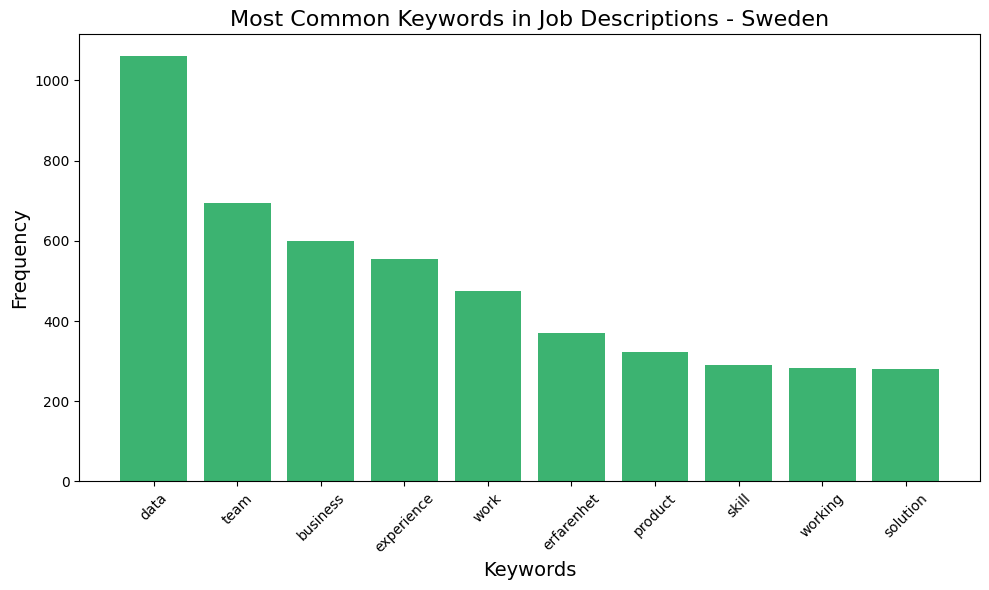

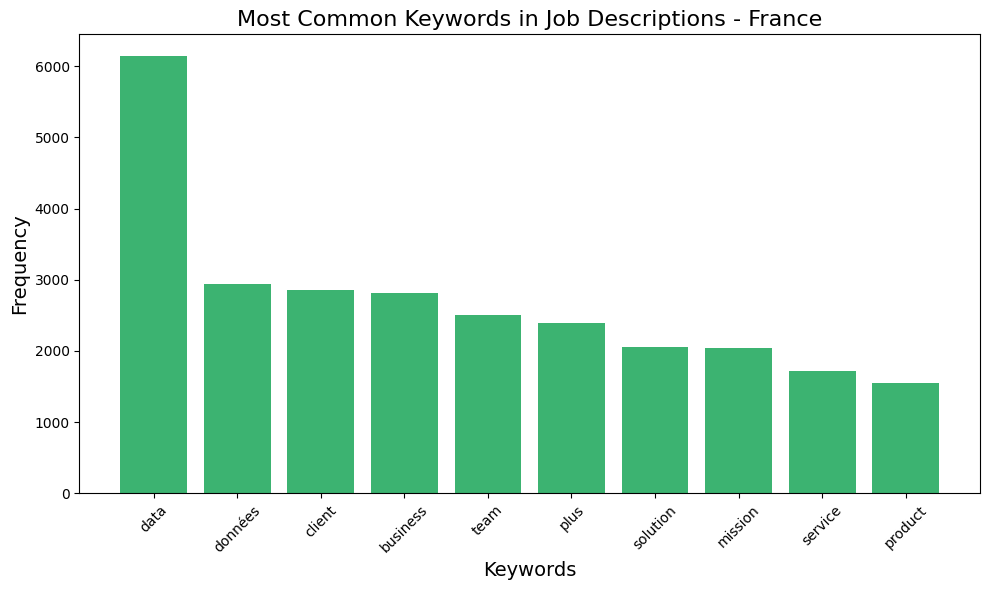

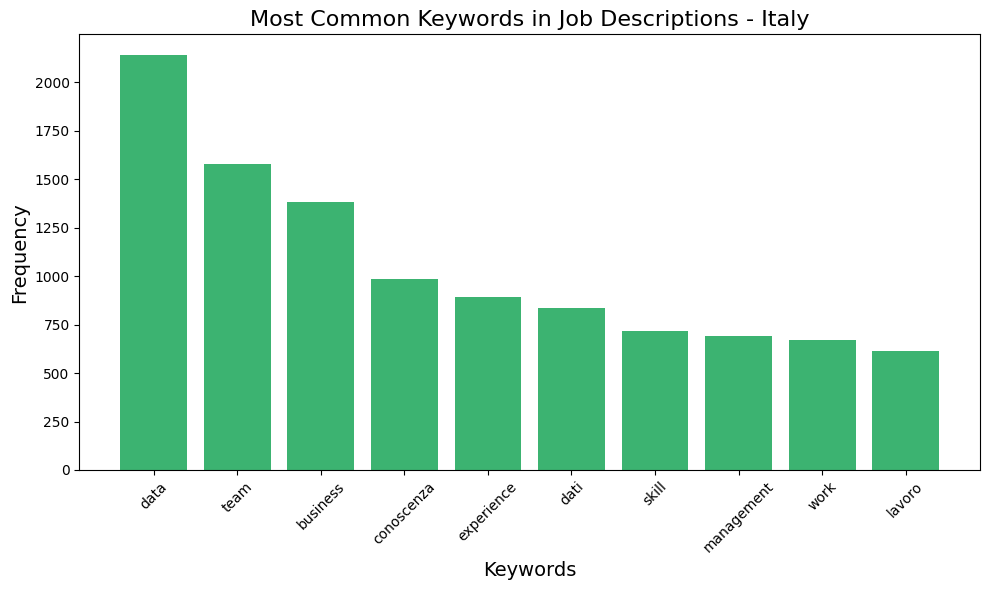

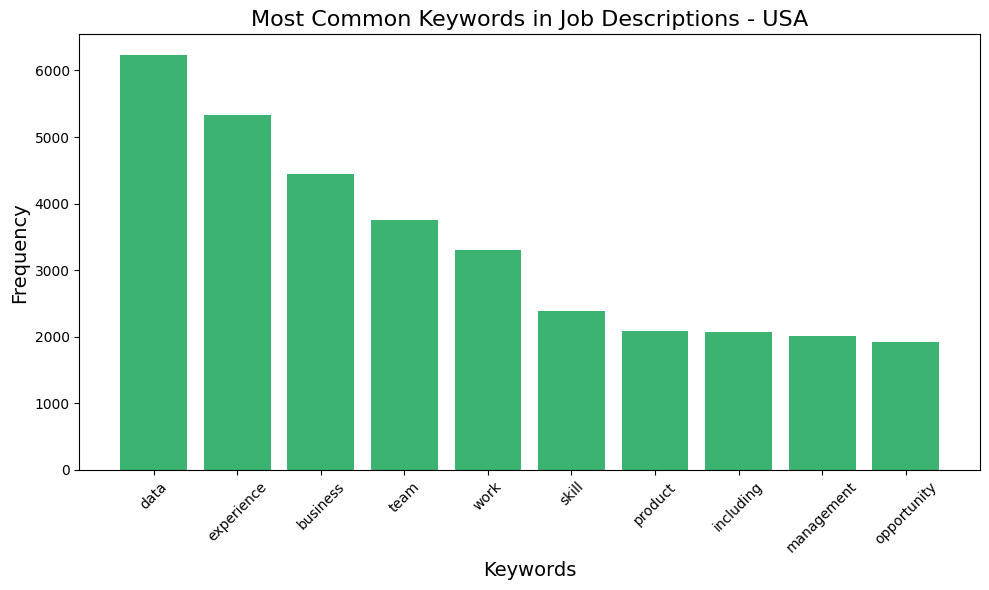

In [64]:
# Plot common keywords 
categorical_plots = {
    country_name: pf.plot_common_keywords(common_keywords[country_name][0], country_name)
    for code, (country_name, *_) in COUNTRIES_LANGUAGES.items()
}

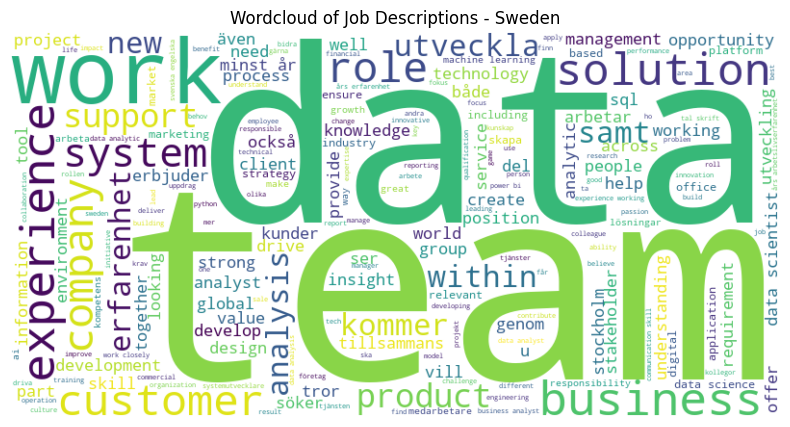

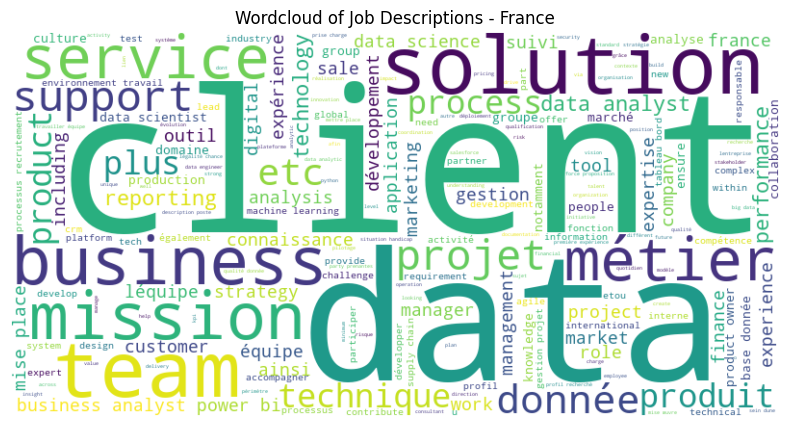

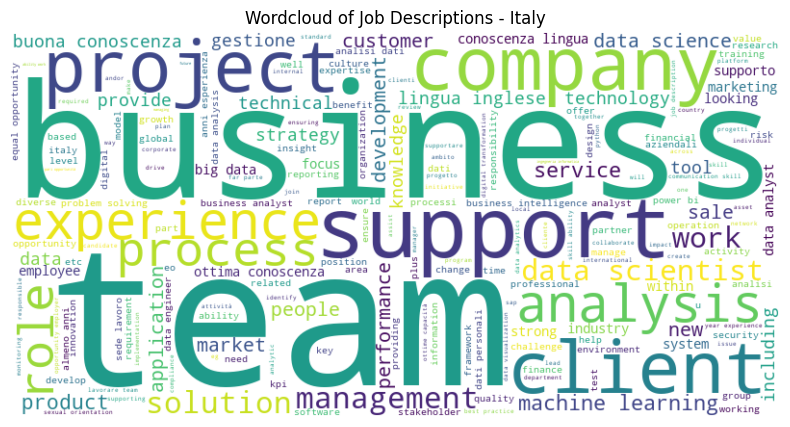

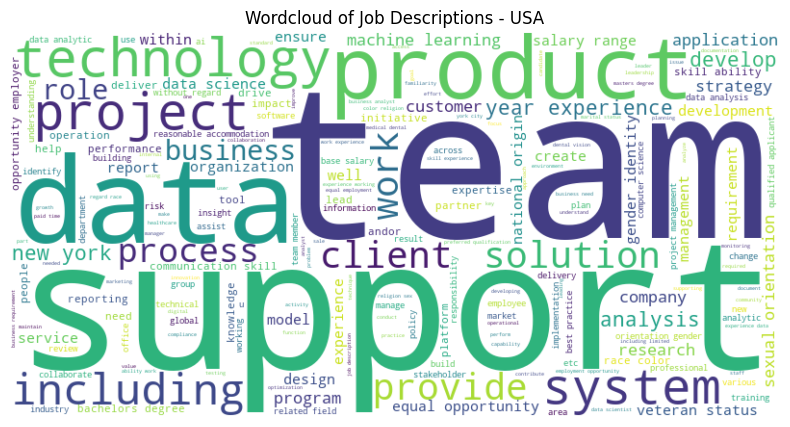

In [65]:
# Word cloud visualizations per country
for code, (country_name, *_) in COUNTRIES_LANGUAGES.items():
    pf.plot_wordtree(common_keywords[country_name][1], country_name)

In [66]:
technical_skills.head()

Category   Keyword  Search Keyword Country  Count
154                        BI Tools  power bi      BI Analyst  France    254
773  Programming Languages/Software    python  Data Scientist     USA    176
380  Programming Languages/Software       sql      BI Analyst  France    167
169                        BI Tools   tableau      BI Analyst  France    161
341  Programming Languages/Software     excel      BI Analyst  France    135

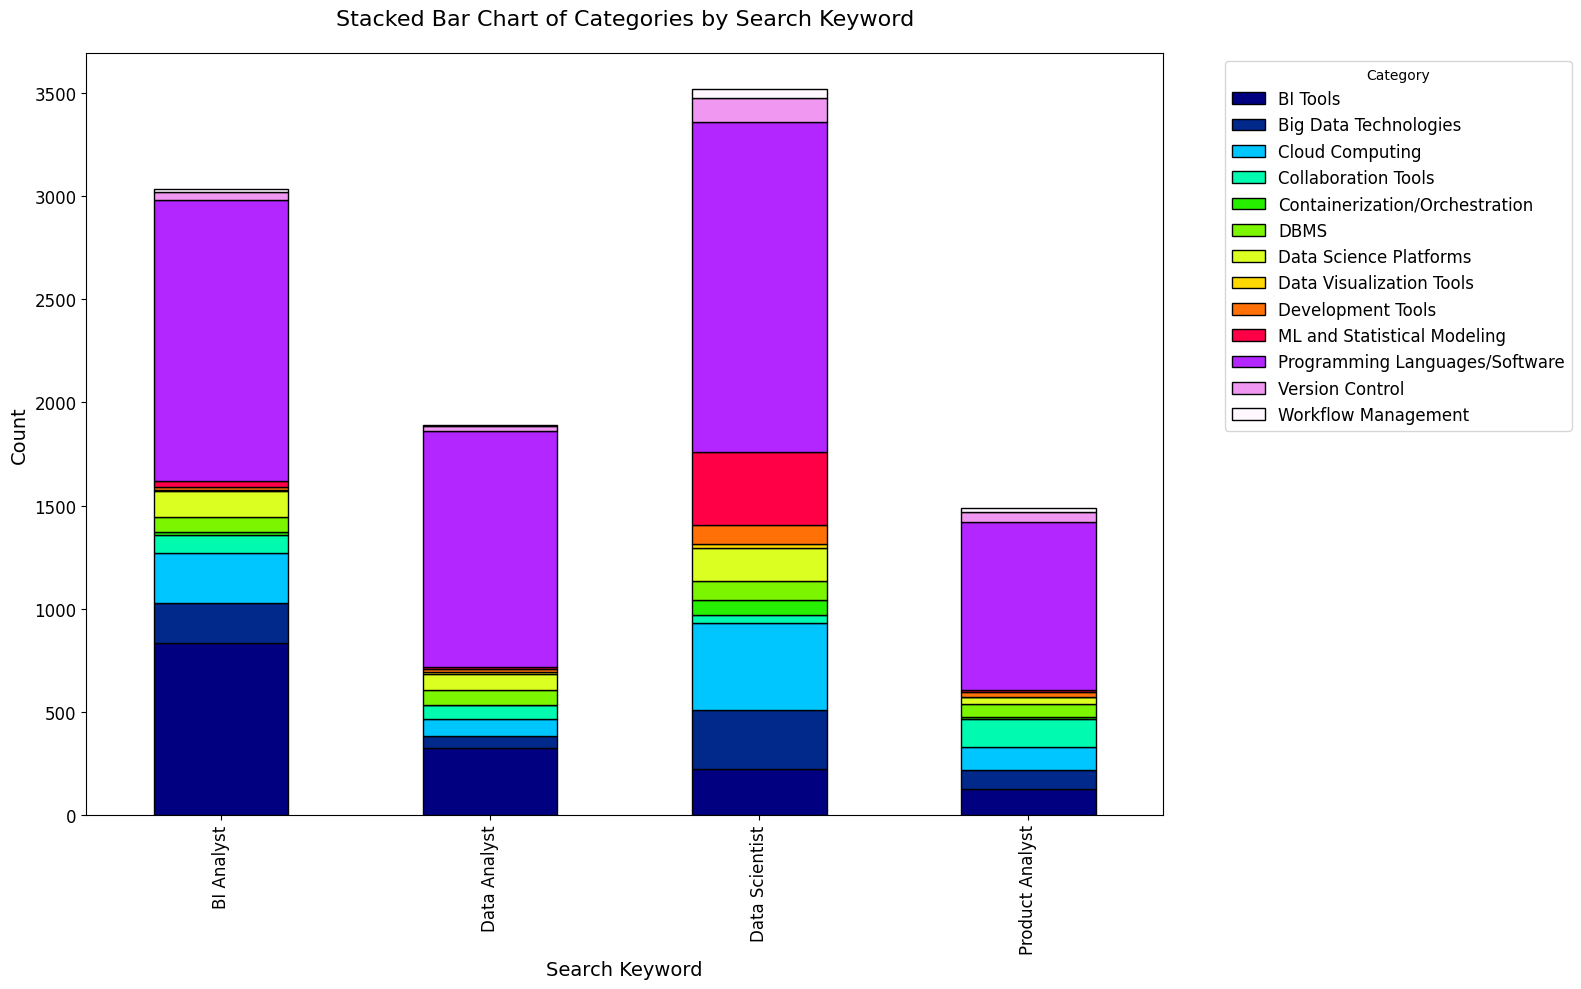

In [67]:
pf.plot_stacked_bar_chart(technical_skills)

In [68]:
technical_skills

Category      Keyword   Search Keyword Country  \
154                        BI Tools     power bi       BI Analyst  France   
773  Programming Languages/Software       python   Data Scientist     USA   
380  Programming Languages/Software          sql       BI Analyst  France   
169                        BI Tools      tableau       BI Analyst  France   
341  Programming Languages/Software        excel       BI Analyst  France   
..                              ...          ...              ...     ...   
22                         BI Tools  thoughtspot   Data Scientist  Sweden   
29            Big Data Technologies       hadoop  Product Analyst  Sweden   
30            Big Data Technologies         hive   Data Scientist  Sweden   
31            Big Data Technologies         hive  Product Analyst  Sweden   
33            Big Data Technologies     redshift       BI Analyst  Sweden   

     Count  
154    254  
773    176  
380    167  
169    161  
341    135  
..     ...  
22       1  
29       1  
30       1  
31       1  
33       1  

[810 rows x 5 columns]

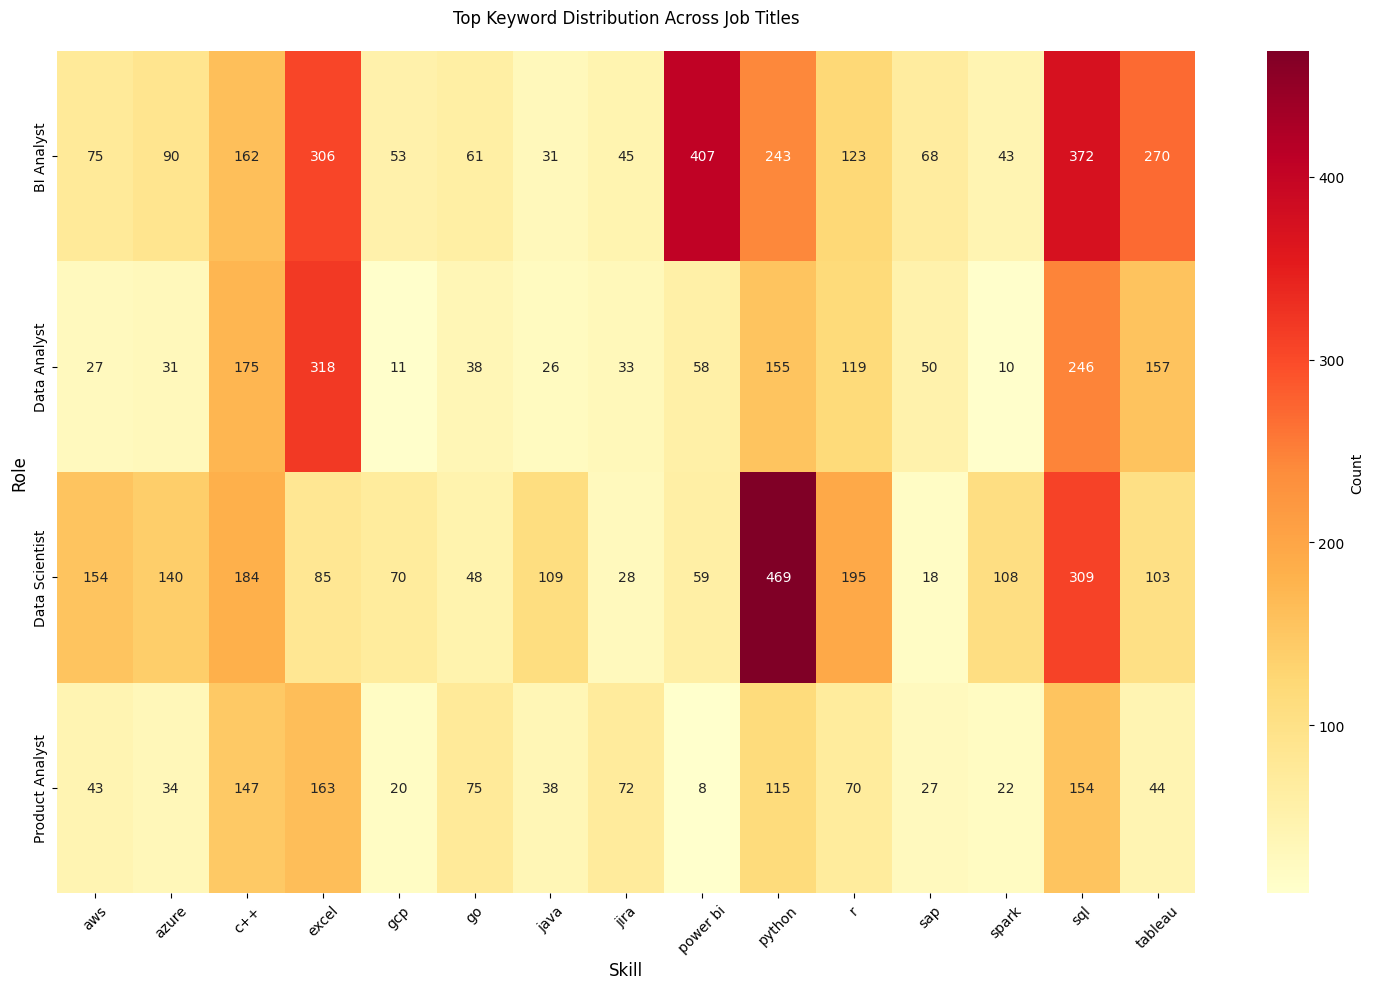

In [69]:
# Skills for different roles 
pf.plot_top_keyword_heatmap(technical_skills) 

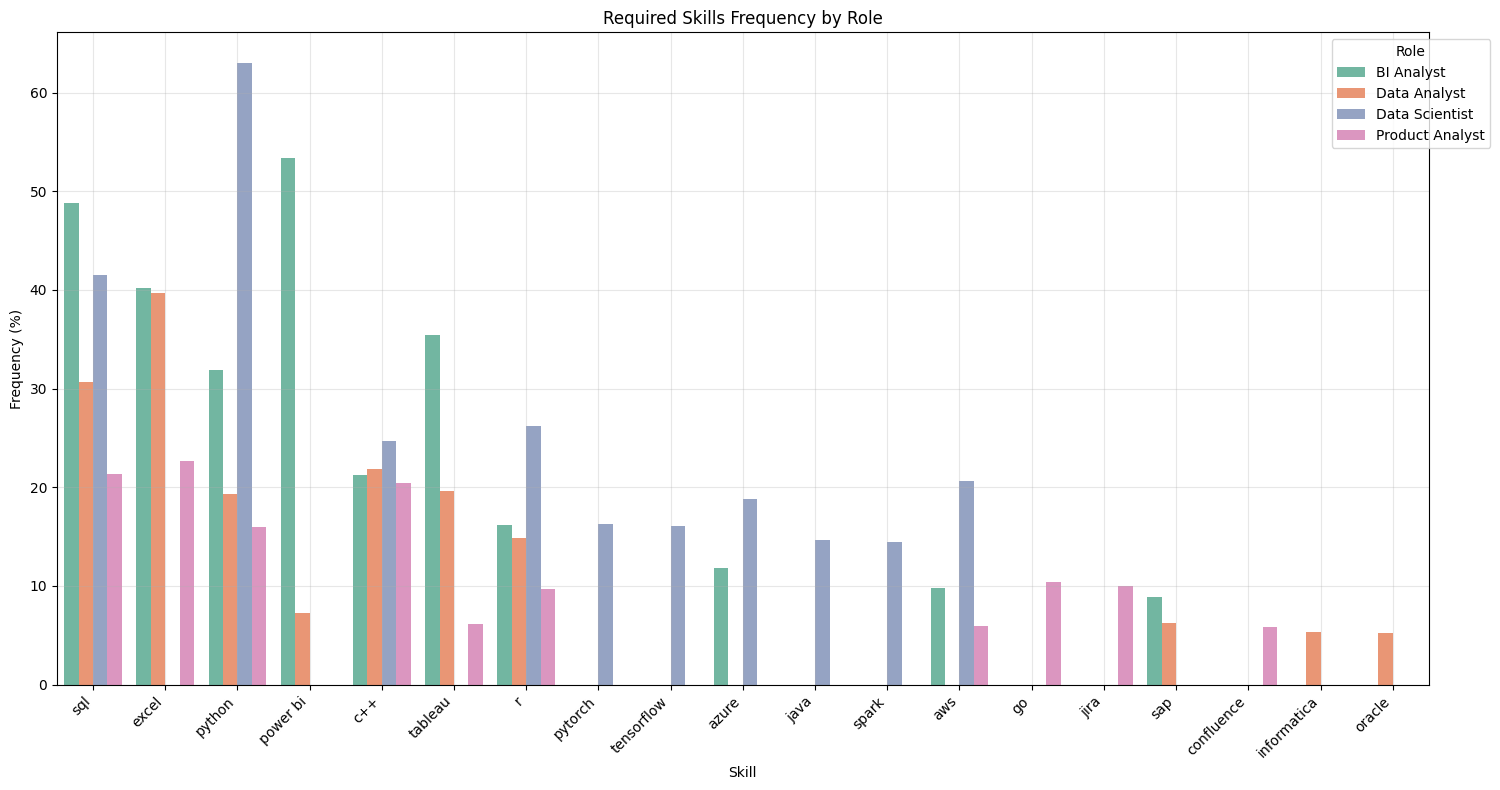

In [70]:
pf.plot_skills_bars(top_skills_by_role)

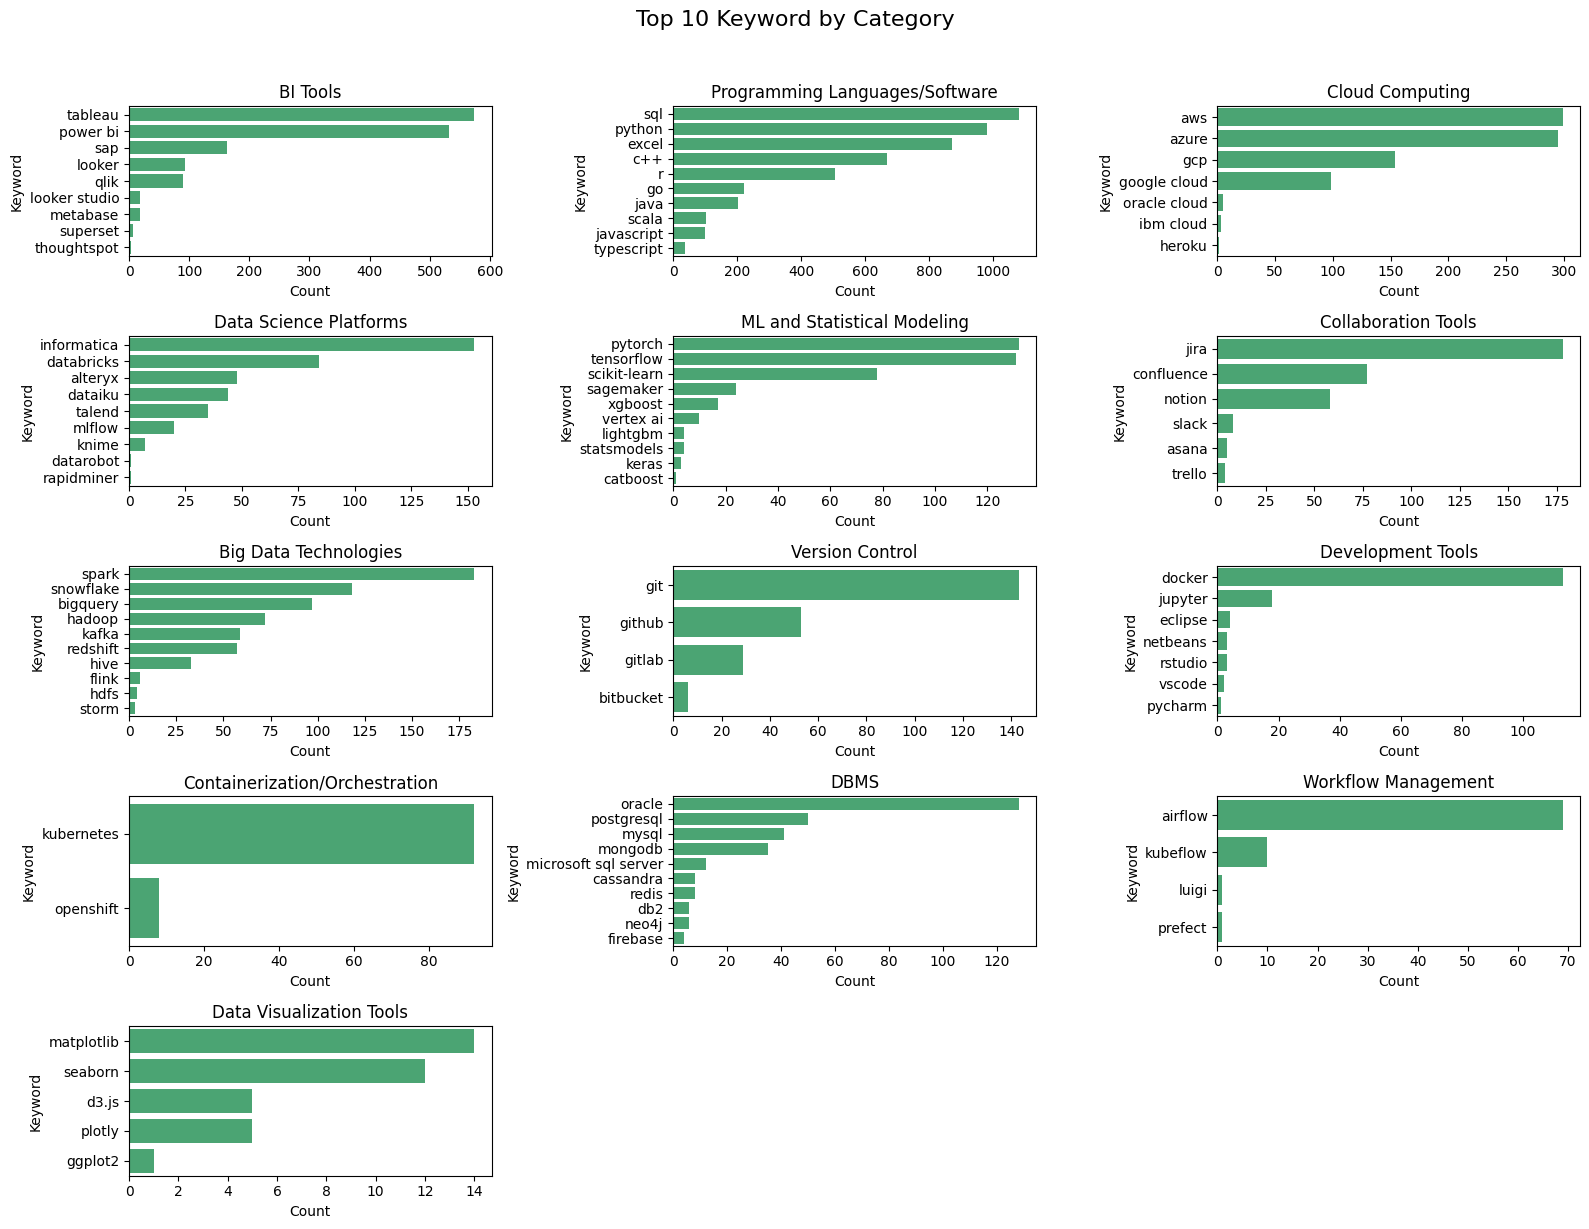

In [71]:
pf.plot_keywords_per_group_subplots(df=technical_skills, group_col='Category', keyword_col='Keyword', count_col='Count', n_top=10)

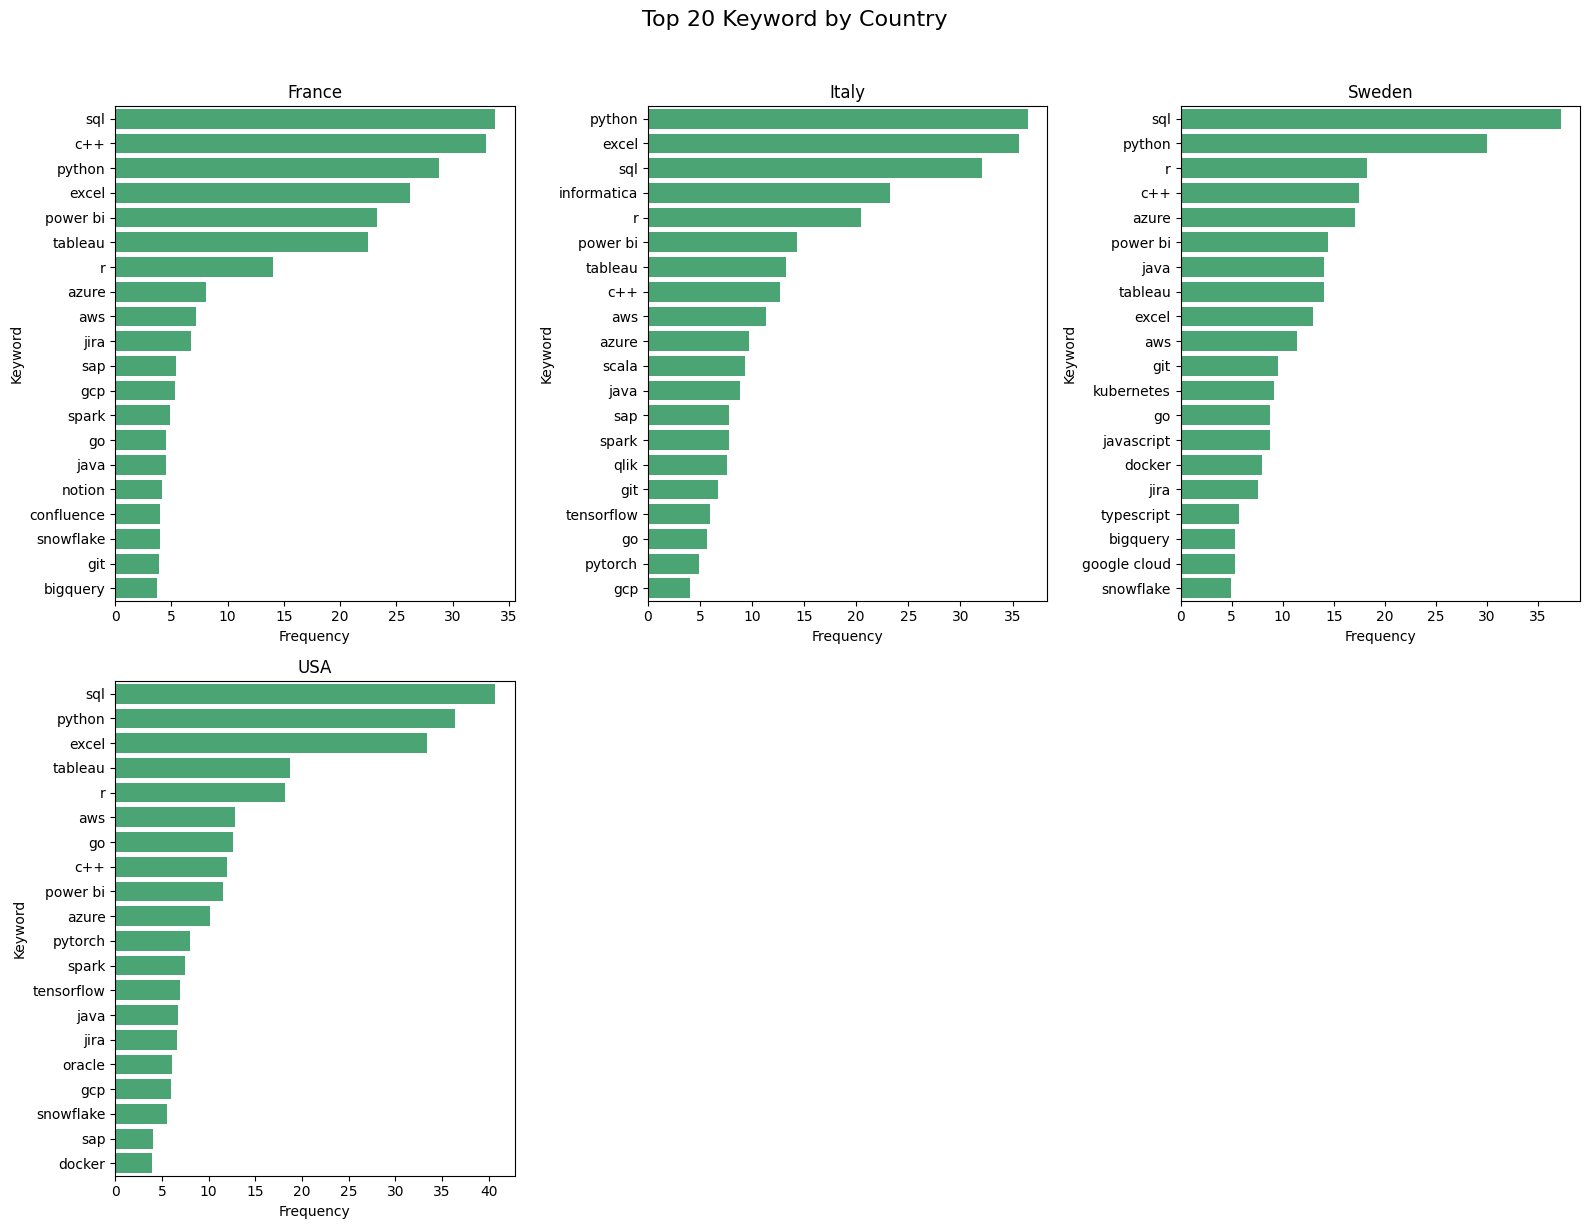

In [72]:
top_skills_by_country.head()
pf.plot_keywords_per_group_subplots(df=skills_country, group_col='Country', keyword_col='Keyword', count_col='Frequency', n_top=20)

In [73]:
global_skills.head()

Category  Keyword  Count  Frequency  Total_jobs
96  Programming Languages/Software      sql   1081      35.70        3028
90  Programming Languages/Software   python    982      32.43        3028
82  Programming Languages/Software    excel    872      28.80        3028
81  Programming Languages/Software      c++    668      22.06        3028
7                         BI Tools  tableau    574      18.96        3028

In [74]:
global_skills.head()
global_skills.query("Category == 'Programming Languages/Software'")['Keyword'].value_counts().nlargest(10).index

Index(['sql', 'python', 'excel', 'c++', 'r', 'go', 'java', 'scala',
       'javascript', 'typescript'],
      dtype='object', name='Keyword')

In [75]:
global_skills['Keyword'].value_counts().nlargest(10).index

Index(['sql', 'python', 'excel', 'c++', 'tableau', 'power bi', 'r', 'aws',
       'azure', 'go'],
      dtype='object', name='Keyword')

__Most rerequested technical skills__: sql, python, excel, c++, r, go, java, scala, javascript, typescript. 

__Most rerequested programming skills__: sql, python, excel, c++, tableau, power bi, r, aws, azure, go.  

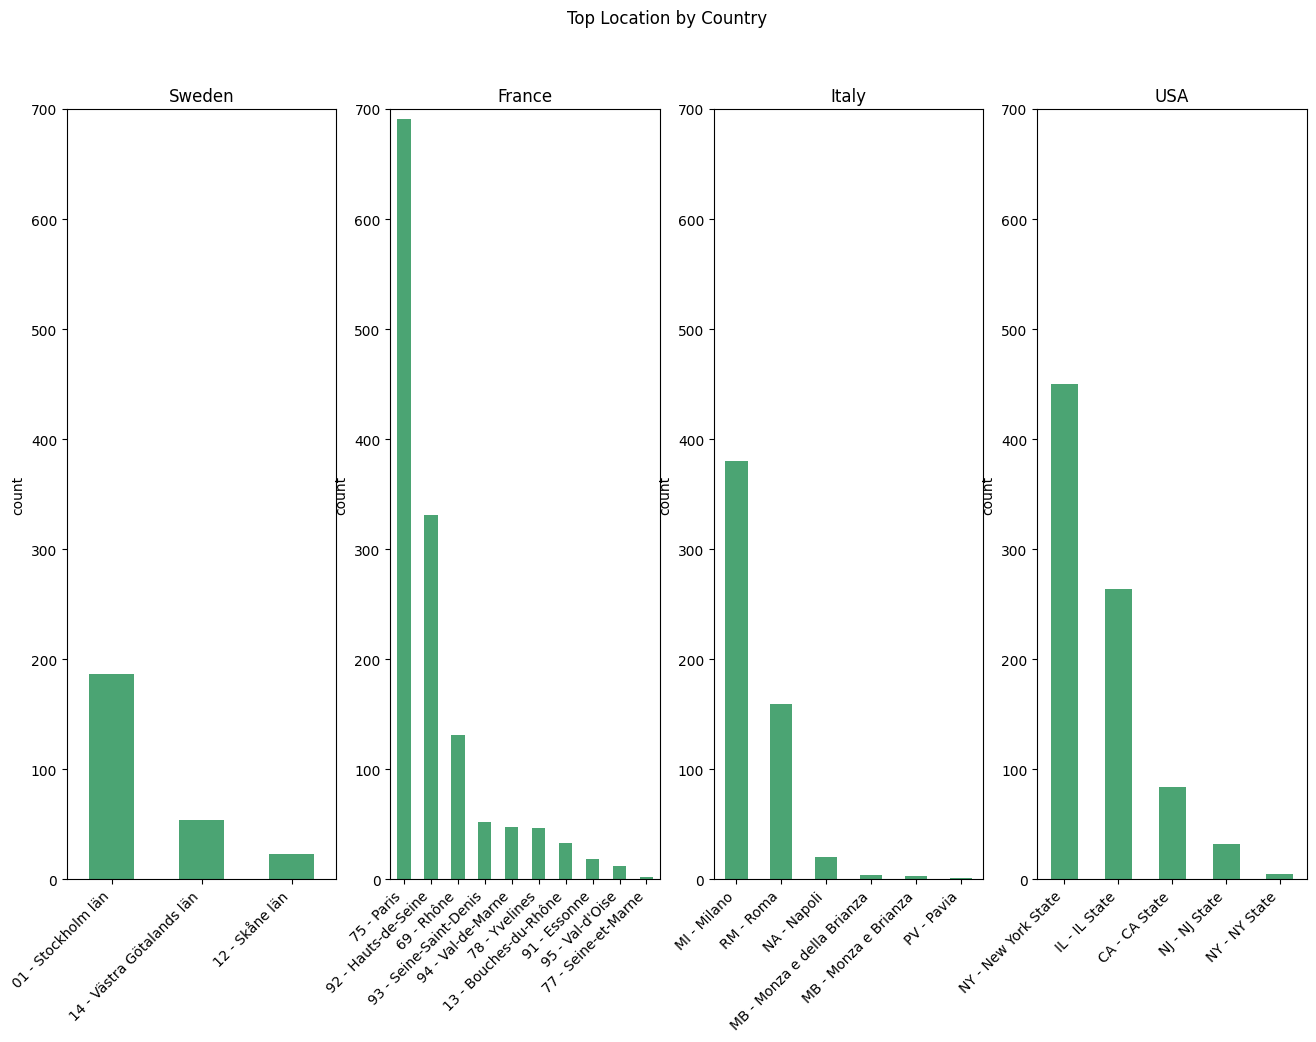

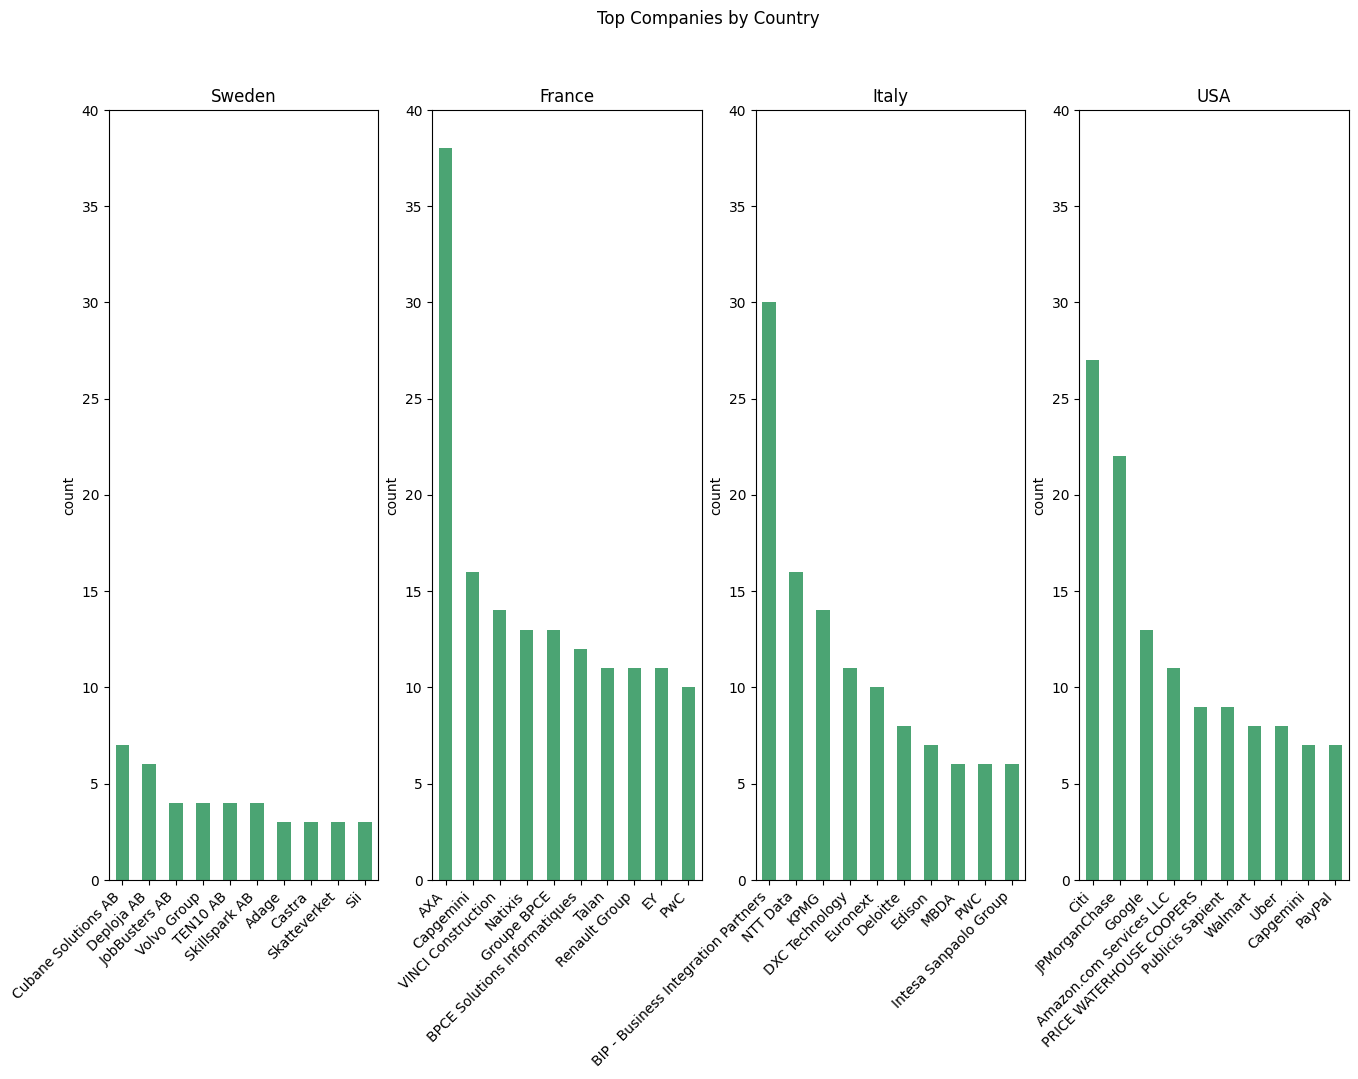

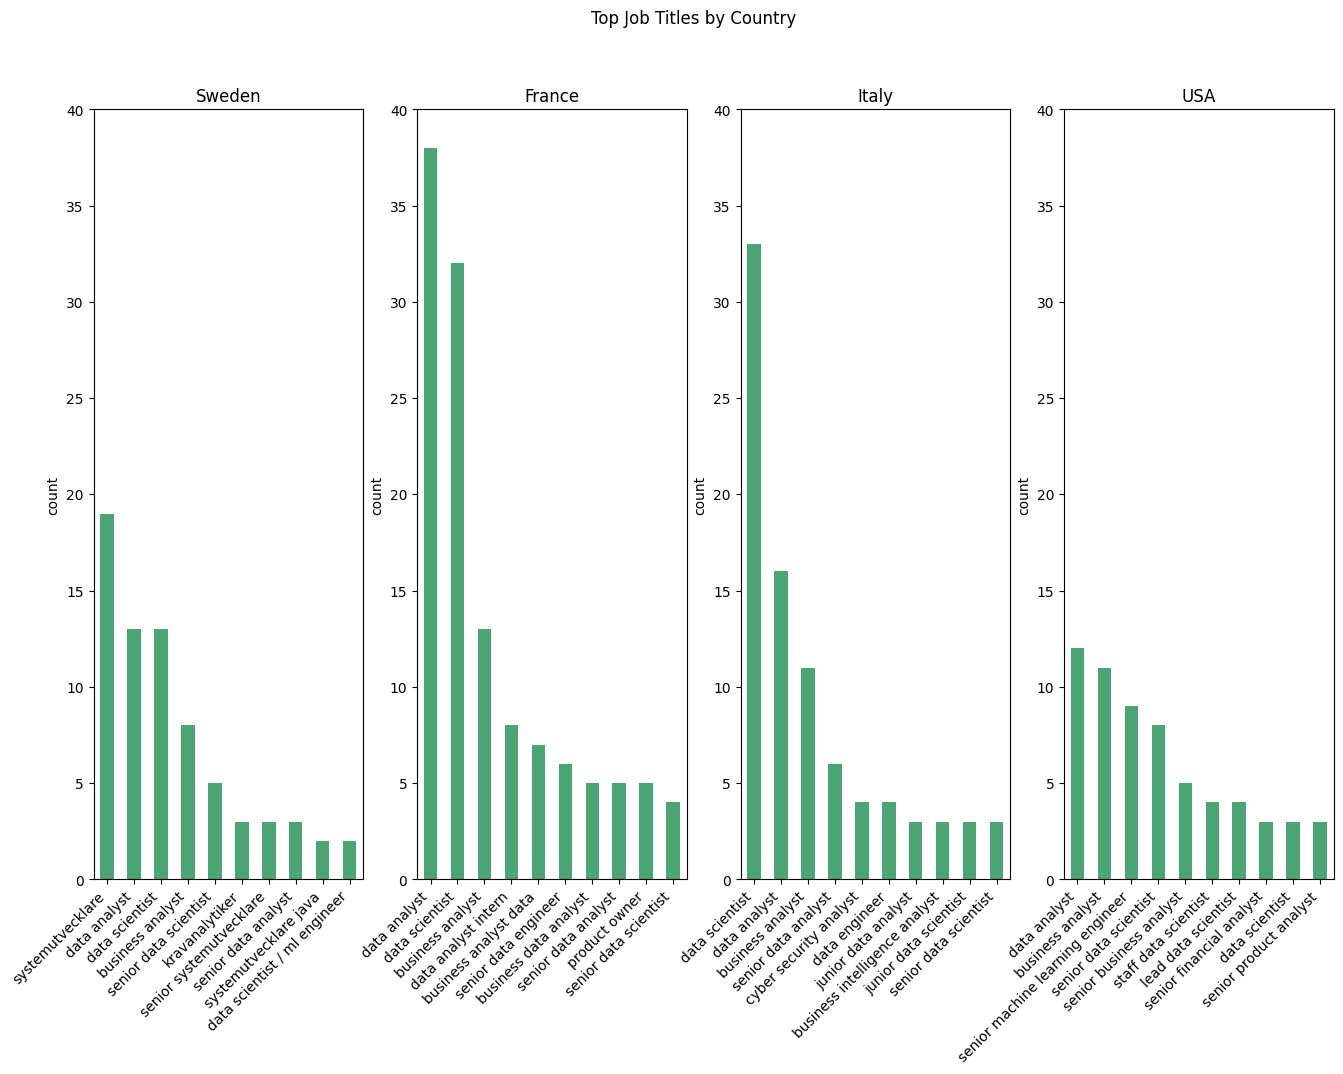

In [76]:
# Categorical variables
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='department',
    title='Top Location by Country', 
    ylim=700
)

# Plot top company names per country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='company_name',
    title='Top Companies by Country', 
    ylim = 40
)

# For job titles by country
pf.plot_grouped_bar(
    df_combined,
    group_col='country',
    value_col='job_title',
    title='Top Job Titles by Country', 
    ylim=40
)

### Numerical features

Shape of melted data: (6056, 2)
Number of non-null values per column:
Variable         6056
EUR per month    1598
dtype: int64

Outliers for min_salary_month_EUR:
Number of outliers: 8
Outlier values:
€19,006.60
€19,634.07
€19,856.46
€19,856.46
€20,102.68
€20,102.68
€20,293.30
€20,650.72
Lower bound: €0.00
Upper bound: €18,665.07

Outliers for max_salary_month_EUR:
Number of outliers: 3
Outlier values:
€29,411.39
€31,682.96
€31,770.33
Lower bound: €0.00
Upper bound: €29,010.29


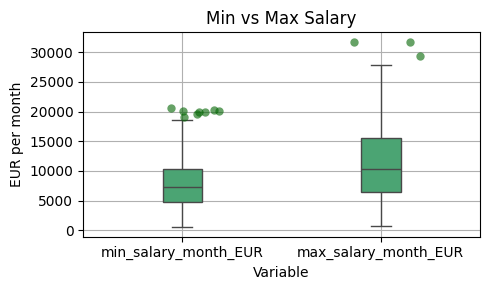

Summary statistics for salary columns:
       min_salary_month_EUR  max_salary_month_EUR
count                 799.0                 799.0
mean                7801.52               11181.4
std                 3916.05               6008.66
min                   500.0                 800.0
25%                 4765.55               6473.21
50%                 7316.23               10333.3
75%                10325.36              15488.04
max                20650.72              31770.33


In [77]:
# Summary statistics and boxplots for salary (outliers with jitter to more easily see them)
salary_cols = ['min_salary_month_EUR', 'max_salary_month_EUR']
outliers_df, outlier_rows = pf.plot_boxplot(df_combined, salary_cols)

print('Summary statistics for salary columns:')
print(df_combined[salary_cols].describe().round(2)) 

In [78]:
outlier_rows[['search_keyword', 'country', 'company_location', 'job_title', 'job_description_norm', 'min_salary_month_EUR', 'max_salary_month_EUR', 'outlier_source']]

search_keyword country                   company_location  \
2409  Data Scientist     USA                       New York, NY   
2434  Data Scientist     USA        Hybrid work in New York, NY   
2436  Data Scientist     USA  Hybrid work in New York, NY 10011   
2609      BI Analyst     USA                       New York, NY   
2610      BI Analyst     USA                       New York, NY   
2625      BI Analyst     USA                       New York, NY   
2653      BI Analyst     USA                       New York, NY   
2848  Data Scientist     USA                        Chicago, IL   
2350  Data Scientist     USA                 New York, NY 10001   

                                              job_title  \
2409                     grp dir, data sci/adv alt -svp   
2434                             founding ml researcher   
2436                             director, data science   
2609  executive director – data & analytics operatio...   
2610  executive director – data & analytics operatio...   
2625       vice president, pgs ai data analytics leader   
2653    vp, operational excellence & business analytics   
2848             senior/lead c++ engineer - market data   
2350  ai strategy & design - healthcare sector - sen...   

                                   job_description_norm  min_salary_month_EUR  \
2409  basic information location ny ny 100 w 33rd po...          20650.716667   
2434  garden garden gardenintel.com accelerates glob...          19856.458333   
2436  role peloton seeking experienced leader field ...             19634.066   
2609  reporting svp cross medium measurement  advanc...          20102.678417   
2610  executive director – data  analytics operation...          20102.678417   
2625  pfizer’s purpose breakthrough change patients’...          19006.601917   
2653  bizops sourcing  strategy group heart transfor...          20293.300417   
2848  ctc cutting-edge proprietary trading firm long...          19856.458333   
2350  ey you’ll chance build career unique are globa...          11326.123833   

      max_salary_month_EUR         outlier_source  
2409          23033.491667             min salary  
2434          31770.333333  min salary,max salary  
2436          25527.462833             min salary  
2609          26957.127833             min salary  
2610          26957.127833             min salary  
2625          31682.964917  min salary,max salary  
2653           26091.38625             min salary  
2848          20650.716667             min salary  
2350          29411.386083             max salary

What are these outliers representing and where are they coming from? 
- All from USA (mostly NY). 
- Founder, director, vice president, VP, and other senior roles. 

Lets also look at the smallest salaries and where they come from. 

In [79]:
# Get min salaries and see if there is a pattern
min_salaries = (df_combined
                  .dropna(subset=['min_salary_month_EUR'])  # Remove rows with NA salaries
                  .nsmallest(10, 'min_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'country', 'company_location', 'min_salary_month_EUR', 'salary']])

min_salaries

search_keyword                                          job_title  \
1699    Data Analyst                                     junior analyst   
265     Data Analyst                alternance - assistant data analyst   
1287      BI Analyst      alternant(e) data analyst connaissance client   
290     Data Analyst    alternant data analyst en business intelligence   
1821    Data Analyst                                cloud/data engineer   
651   Data Scientist                        stage - data analyst junior   
1691    Data Analyst                     logistics analyst - internship   
728   Data Scientist                            alternance data analyst   
513     Data Analyst  transversal business analyst - stage - paris (...   
1408      BI Analyst                               data analyst - stage   

                   company_name country  \
1699                 Wayshi srl   Italy   
265                  CMI France  France   
1287                 IMX FRANCE  France   
290                   HEC Paris  France   
1821  Quick Algorithm Analytics   Italy   
651                         AXA  France   
1691                    Samsung   Italy   
728            The Nuum Factory  France   
513                   papernest  France   
1408      SAS Terroirs d'Avenir  France   

                                  company_location  min_salary_month_EUR  \
1699                                  20122 Milano                 500.0   
265   Télétravail partiel à 92300 Levallois-Perret                 721.0   
1287            Télétravail partiel à 93500 Pantin                759.78   
290                            78350 Jouy-en-Josas                 800.0   
1821                   Remoto in Milano, Lombardia                 800.0   
651                                  Suresnes (92)                 832.0   
1691                             Milano, Lombardia                 900.0   
728                                  69009 Lyon 9e                 926.0   
513              Télétravail partiel à 75019 Paris                1000.0   
1408   Télétravail partiel à 94400 Vitry-sur-Seine                1000.0   

                                                 salary  
1699                            500 € - 1.300 € al mese  
265         De 721 € à 1 747 € par mois  -   Alternance  
1287  De 759,78 € à 1 766,92 € par mois  -   Alternance  
290         De 800 € à 1 500 € par mois  -   Alternance  
1821                                      800 € al mese  
651   De 832 € à 1 868 € par mois  -   Temps partiel...  
1691                                      900 € al mese  
728          À partir de 926 € par mois  -   Alternance  
513            De 1 000 € à 1 300 € par mois  -   Stage  
1408     De 1 000 € à 1 400 € par mois  -   Temps plein

The lowest salaries are from France and Italy, for internships, 'alternance', and junior roles. 

In [80]:
# Get top salaries in France and see if there is a pattern
top_fr_salaries = (df_combined[df_combined['country'] == 'France']
                  .dropna(subset=['max_salary_month_EUR'])  # Remove rows with NA salaries
                  .nlargest(10, 'max_salary_month_EUR')
                  [['search_keyword', 'job_title', 'company_name', 'company_location', 'max_salary_month_EUR', 'salary']])

top_fr_salaries

search_keyword                                          job_title  \
1560       BI Analyst  cloud analyste informatique - azure aws finops...   
1018  Product Analyst                  data gouvernance (it) / freelance   
1449       BI Analyst  data analyste informatique expert sas (it) / f...   
488      Data Analyst  senior data analyste informatique / data gouve...   
382      Data Analyst  géologiste - data analyste informatique - 270 ...   
404      Data Analyst  business data analyste informatique - solvency...   
1307       BI Analyst  geodata scientist / analyste informatique (it)...   
1369       BI Analyst  data analyste informatique / développeur bi ta...   
1475       BI Analyst  business analyste informatique - gm / emtn (it...   
769   Product Analyst         business analyst si gestion des défauts...   

                    company_name          company_location  \
1560                 PROPULSE IT  Télétravail à Paris (75)   
1018                    PARTENOR                Paris (75)   
1449          Cogniwave dynamics                Paris (75)   
488                      LeHibou                Paris (75)   
382                    ISUPPLIER                Paris (75)   
404                      NEXORIS                Paris (75)   
1307  ODHCOM - FREELANCEREPUBLIK                Paris (75)   
1369                Bek Advisory                Paris (75)   
1475                     NEXORIS                Paris (75)   
769                  1Dsolutions                Paris (75)   

      max_salary_month_EUR                                             salary  
1560               18000.0  De 450 € à 900 € par jour  -   Statut cadre, I...  
1018               15200.0  De 520 € à 760 € par jour  -   Indépendant / f...  
1449               14000.0  De 600 € à 700 € par jour  -   Indépendant / f...  
488                13000.0        650 € par jour  -   Indépendant / freelance  
382                12900.0        645 € par jour  -   Indépendant / freelance  
404                12000.0  De 550 € à 600 € par jour  -   Indépendant / f...  
1307               12000.0  De 480 € à 600 € par jour  -   Indépendant / f...  
1369               12000.0        600 € par jour  -   Indépendant / freelance  
1475               12000.0  De 590 € à 600 € par jour  -   Indépendant / f...  
769                11000.0                    550 € par jour  -   Temps plein

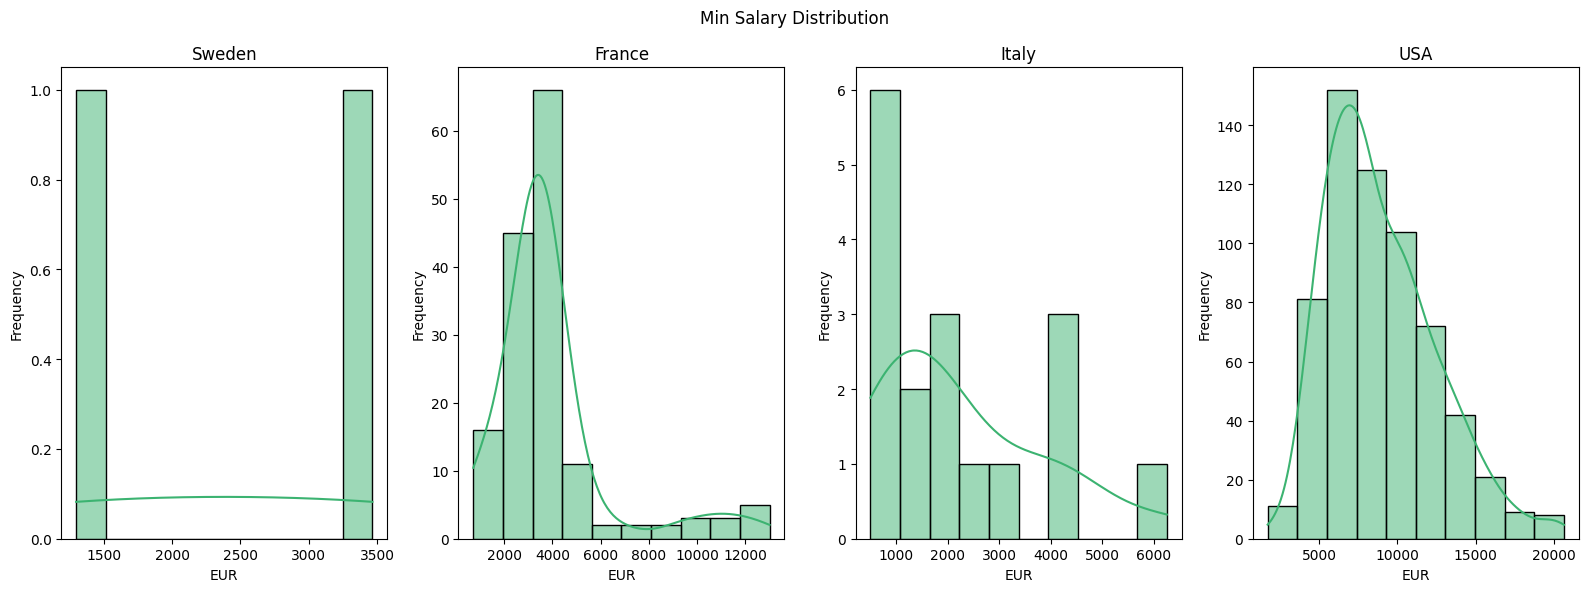

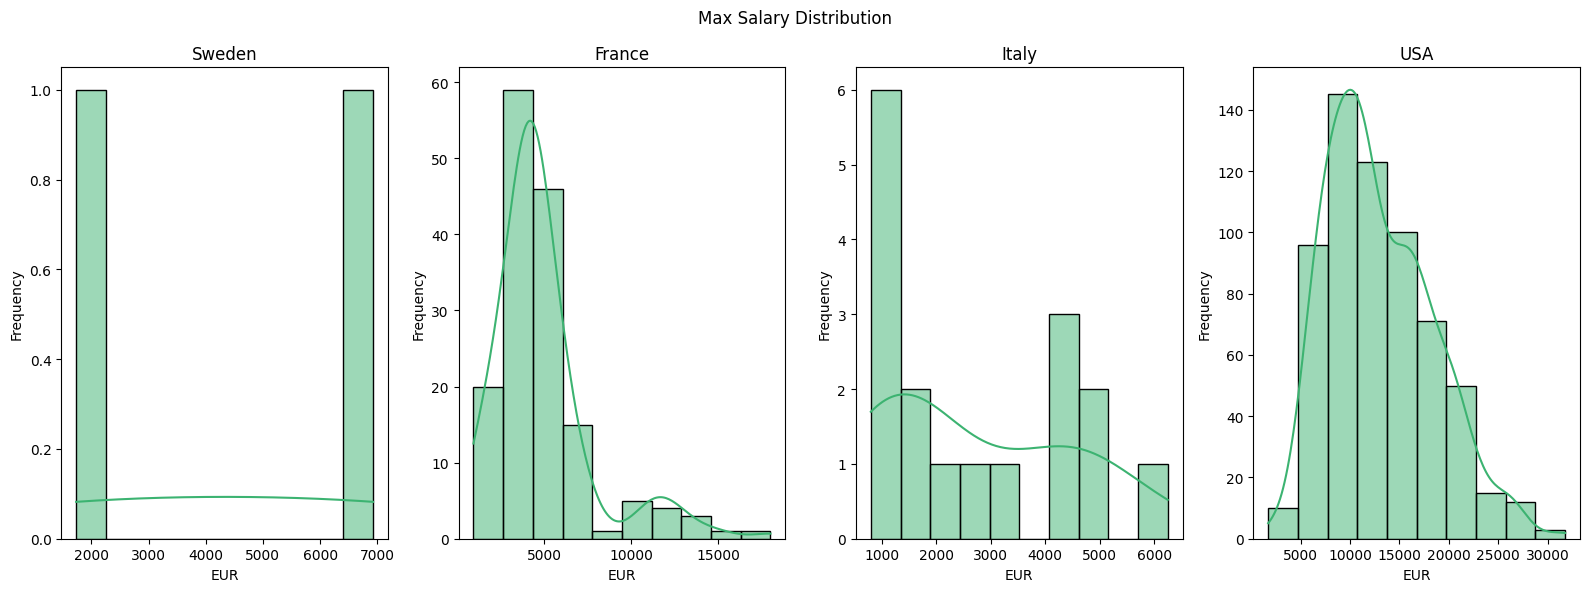

In [81]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[0], 
    bins = 10, 
    kde = True, 
    title = 'Min Salary Distribution'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col = 'country', 
    value_col = salary_cols[1], 
    bins = 10, 
    kde = True, 
    title = 'Max Salary Distribution'
)

In [82]:
salary_ranges = (
    df_combined
    .groupby('country', observed=True)
    .agg({
        'min_salary_month_EUR': 'min',
        'max_salary_month_EUR': 'max'
    })
    .rename(columns={
        'min_salary_month_EUR': 'Lowest Monthly Salary (EUR)',
        'max_salary_month_EUR': 'Highest Monthly Salary (EUR)'
    })
)

salary_ranges

Lowest Monthly Salary (EUR)  Highest Monthly Salary (EUR)
country                                                           
France                         721.0                       18000.0
Italy                          500.0                        6250.0
Sweden                        1299.0                        6928.0
USA                         1715.598                  31770.333333

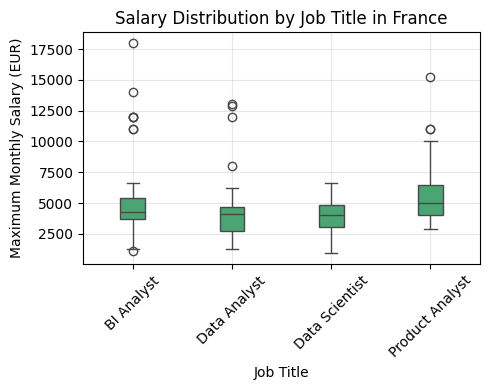

In [83]:
pf.plot_salary_by_keyword(df_combined)

Lets look into the second peaks (e.g. max salary for France, with second peak after 10 000 EUR). 

In [84]:
# Filter by country 
filtered_df = df_combined[(df_combined['country'] == 'France') & 
                         (df_combined['min_salary_month_EUR'].notna())]
# Filter salary range 
filtered_df = filtered_df[(filtered_df['max_salary_month_EUR'] > 10000) & 
           (filtered_df['max_salary_month_EUR'] < 16000)]

filtered_df.head()

job_id  page                                           job_link  \
382      639    22  https://www.indeed.fr/rc/clk?jk=9bf7127dab79a5...   
404      705    26  https://www.indeed.fr/rc/clk?jk=1576873c14d2f5...   
488      882    38  https://www.indeed.fr/rc/clk?jk=a18f4e1522a6bc...   
769     1414     2  https://www.indeed.fr/rc/clk?jk=7743e6fa91e27d...   
1015    1750    24  https://www.indeed.fr/rc/clk?jk=a7b21bcbaba540...   

       search_keyword search_location  \
382      Data Analyst      Paris (75)   
404      Data Analyst      Paris (75)   
488      Data Analyst      Paris (75)   
769   Product Analyst      Paris (75)   
1015  Product Analyst      Paris (75)   

                                              job_title company_name  \
382   géologiste - data analyste informatique - 270 ...    ISUPPLIER   
404   business data analyste informatique - solvency...      NEXORIS   
488   senior data analyste informatique / data gouve...      LeHibou   
769          business analyst si gestion des défauts...  1Dsolutions   
1015  data analyste informatiquee gcp / sql / big qu...     HIGHTEAM   

                 company_location  \
382                    Paris (75)   
404                    Paris (75)   
488                    Paris (75)   
769                    Paris (75)   
1015  Télétravail à Île-de-France   

                                                 salary  \
382         645 € par jour  -   Indépendant / freelance   
404   De 550 € à 600 € par jour  -   Indépendant / f...   
488         650 € par jour  -   Indépendant / freelance   
769                     550 € par jour  -   Temps plein   
1015  De 500 € à 550 € par jour  -   Indépendant / f...   

                                        job_description  ...         region  \
382   Compétences : géologie ? biostratigraphie / sé...  ...  Île-de-France   
404   Nous recherchons, pour l'un de nos partenaire ...  ...  Île-de-France   
488   Analyse de l?existant et recommandations techn...  ...  Île-de-France   
769   TJM 550€ 
 
 
 
 
 
 
 
 
 
 PARIS 
 
 
 
 
 
...  ...  Île-de-France   
1015  Une offre de solutions de data analyse et de c...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
382   France      645.0      645.0     euro       day            12900.0   
404   France      550.0      600.0     euro       day            11000.0   
488   France      650.0      650.0     euro       day            13000.0   
769   France      550.0      550.0     euro       day            11000.0   
1015  France      500.0      550.0     euro       day            10000.0   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
382              12900.0               12900.0              12900.0  
404              12000.0               11000.0              12000.0  
488              13000.0               13000.0              13000.0  
769              11000.0               11000.0              11000.0  
1015             11000.0               10000.0              11000.0  

[5 rows x 25 columns]

Highest salaries in France are for indépendant / freelance jobs in Paris, paid by day rate. 

Summary: 
- **Sweden**: Only has 2 data points. This was the smallest dataset but it also makes sense that there are few values since Swedish interview processes usually do not involve discussing salaries until the very end of the rounds. 
- **France**: It almost looks like there are two peaks. This is because we have several rows with high salaries for freelance work in Paris. 
- **Italy**: Also has a second peak for jobs in Milano. But this is also be since we have fewer data points. 
- **USA**: Significantly higher salaries overall, as to be expected. 

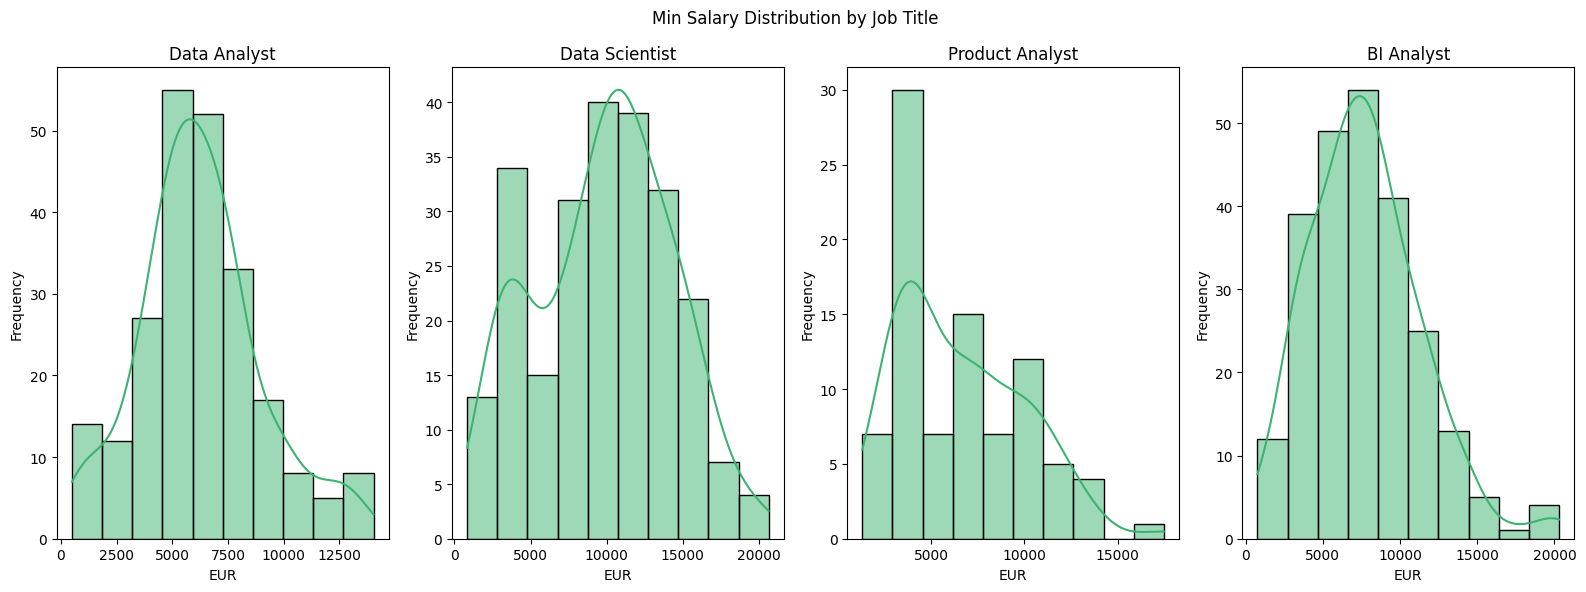

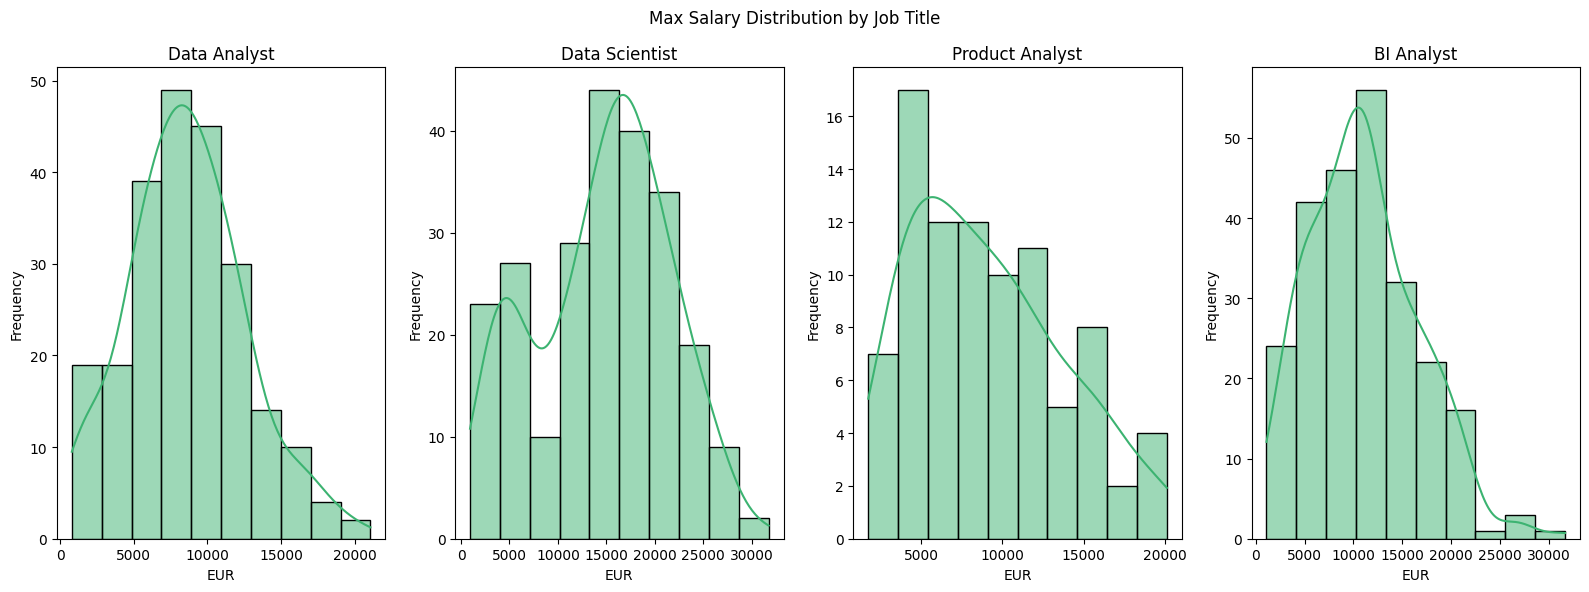

In [94]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution by Job Title'
)

pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution by Job Title'
)

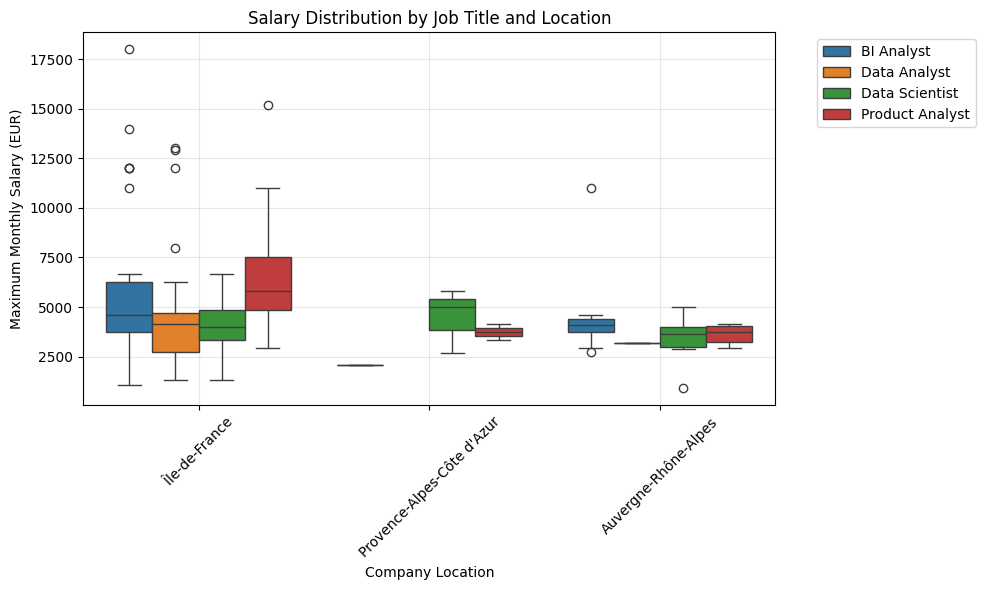

In [95]:
common_locations = (df_combined
                   .query("country == 'France'")
                   ['region']
                   .value_counts()
                   .nlargest(3)
                   .index)

# Plot using filtered data
pf.plot_box(
    df=df_combined.query("country == 'France' and region in @common_locations"),
    y='max_salary_month_EUR', 
    x='region', 
    hue='search_keyword',
    figsize=(10, 6)
)

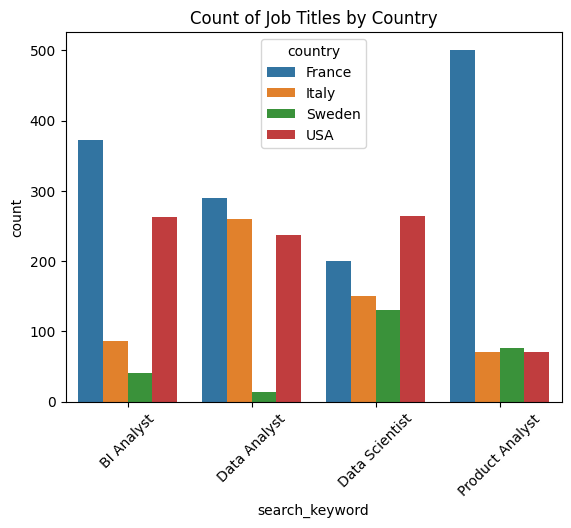

In [96]:
sns.countplot(data=df_combined, x='search_keyword', hue='country')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Country')
plt.show()

Why are there tons of Product Analyst jobs (with high salaries) in France? 

In [102]:
mask = (df_combined['country'] == 'France') & (df_combined['search_keyword'] == 'Product Analyst')
df_filtered = df_combined[mask]
df_filtered.head()

job_id  page                                           job_link  \
753    1396     1  https://www.indeed.fr/rc/clk?jk=d886e78dfaefed...   
754    1397     1  https://www.indeed.fr/rc/clk?jk=83d03d09fe3962...   
755    1398     1  https://www.indeed.fr/rc/clk?jk=4ad068c42c765d...   
756    1399     1  https://www.indeed.fr/rc/clk?jk=b5c92960b1bd0f...   
757    1400     1  https://www.indeed.fr/rc/clk?jk=1af1dd23ab3df7...   

      search_keyword search_location                           job_title  \
753  Product Analyst      Paris (75)               business data analyst   
754  Product Analyst      Paris (75)             junior solution analyst   
755  Product Analyst      Paris (75)          global market data analyst   
756  Product Analyst      Paris (75)                    business analyst   
757  Product Analyst      Paris (75)  it business analyst (banque) paris   

          company_name company_location            salary  \
753      Renault Group       Paris (75)       Temps plein   
754               SCOR       Paris (75)               NaN   
755               URGO       Paris (75)               NaN   
756  Harmonie Mutuelle  92320 Châtillon  CDI, Temps plein   
757             Sogeti       Paris (75)               CDI   

                                       job_description  ...         region  \
753  Société
  
  DIAC SA
  
 
  Descriptif du post...  ...  Île-de-France   
754  Context 
 The Tech & Data department (~200 emp...  ...  Île-de-France   
755  Paris
        
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 ...  ...  Île-de-France   
756  Vous êtes en quête d'une nouvelle aventure pro...  ...  Île-de-France   
757  Qui sommes nous ?  
 
 
 Choisir Capgemini, c'...  ...  Île-de-France   

    country min_salary max_salary currency time_unit min_salary_monthly  \
753  France       <NA>       <NA>     <NA>      <NA>               <NA>   
754  France       <NA>       <NA>     <NA>      <NA>               <NA>   
755  France       <NA>       <NA>     <NA>      <NA>               <NA>   
756  France       <NA>       <NA>     <NA>      <NA>               <NA>   
757  France       <NA>       <NA>     <NA>      <NA>               <NA>   

     max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
753                <NA>                  <NA>                 <NA>  
754                <NA>                  <NA>                 <NA>  
755                <NA>                  <NA>                 <NA>  
756                <NA>                  <NA>                 <NA>  
757                <NA>                  <NA>                 <NA>  

[5 rows x 25 columns]

In [103]:
top_rows = df_filtered.nlargest(10, 'max_salary')
top_rows['job_description_norm']
top_rows.head()

job_id  page                                           job_link  \
843     1521     9  https://www.indeed.fr/rc/clk?jk=2df1afecc2a96e...   
1111    1873    32  https://www.indeed.fr/rc/clk?jk=d3b12f07bad6d0...   
1117    1881    33  https://www.indeed.fr/rc/clk?jk=6a28258901be81...   
959     1684    20  https://www.indeed.fr/rc/clk?jk=70e00780d3addb...   
1098    1851    31  https://www.indeed.fr/rc/clk?jk=5996b1f6e681fc...   

       search_keyword search_location  \
843   Product Analyst      Paris (75)   
1111  Product Analyst      Paris (75)   
1117  Product Analyst      Paris (75)   
959   Product Analyst      Paris (75)   
1098  Product Analyst      Paris (75)   

                                              job_title    company_name  \
843                                business analyst cib          Avanty   
1111  chef de projet moa assurance vie, retraite, ep...          Avanty   
1117  chef de projet moa assurance santé prévoyance ...          Avanty   
959                   consultant senior people & change  Groupe Demeter   
1098                chef de projet moa asset management          Avanty   

                                   company_location  \
843                                      Paris (75)   
1111                                     Paris (75)   
1117                                     Paris (75)   
959   Télétravail partiel à 92200 Neuilly-sur-Seine   
1098                                     Paris (75)   

                                                 salary  \
843   De 45 000 € à 90 000 € par an  -   CDI, Temps ...   
1111  De 40 000 € à 90 000 € par an  -   CDI, Temps ...   
1117  De 45 000 € à 90 000 € par an  -   CDI, Temps ...   
959      De 50 000 € à 80 500 € par an  -   Temps plein   
1098  De 40 000 € à 80 000 € par an  -   CDI, Temps ...   

                                        job_description  ...         region  \
843   Avanty  recherche des  Business Analysts  pour...  ...  Île-de-France   
1111  Avanty  recherche pour sa  Business Unit Assur...  ...  Île-de-France   
1117  Le Groupe Ailancy est composé de 2 cabinets de...  ...  Île-de-France   
959   Le Groupe DEMETER est un cabinet de recrutemen...  ...  Île-de-France   
1098  Avanty  recherche pour sa  Business Unit Asset...  ...  Île-de-France   

     country min_salary max_salary currency time_unit min_salary_monthly  \
843   France    45000.0    90000.0     euro      year             3750.0   
1111  France    40000.0    90000.0     euro      year        3333.333333   
1117  France    45000.0    90000.0     euro      year             3750.0   
959   France    50000.0    80500.0     euro      year        4166.666667   
1098  France    40000.0    80000.0     euro      year        3333.333333   

      max_salary_monthly  min_salary_month_EUR max_salary_month_EUR  
843               7500.0                3750.0               7500.0  
1111              7500.0           3333.333333               7500.0  
1117              7500.0                3750.0               7500.0  
959          6708.333333           4166.666667          6708.333333  
1098         6666.666667           3333.333333          6666.666667  

[5 rows x 25 columns]

Looking at the job titles it looks like the search filter did a too broad search for 'product analyst', i.e. it included a range of different jobs (analyst, product owner, business analyst, developer etc). The results for this categoy are perhaps not so representative (for France, at least). This might be a translation issue, since a lot of the job listings in France were posted in French. 

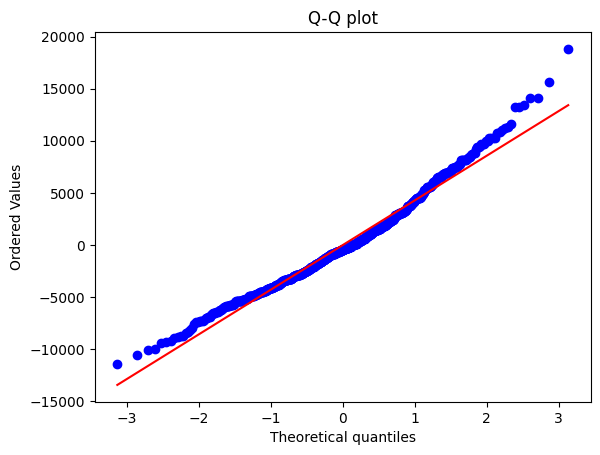

Shapiro-Wilk test:
Statistic: 0.9775
p-value: 9.16e-10

Levene test for search_keyword:
Statistic: 21.2291
p-value: 3.10e-13

Levene test for country:
Statistic: 30.0424
p-value: 2.10e-18


In [104]:
# Are salaries significantly different in different countries? Are salaries significantly different for different search keywords? 
df_clean = df_combined.dropna(subset=['max_salary_month_EUR', 'search_keyword', 'country']) # Remove rows with NaN values in relevant columns
model = ols('max_salary_month_EUR ~ C(search_keyword) + C(country)', data=df_clean).fit()
af.check_anova_assumptions(model, df_clean, 'search_keyword', 'country', 'max_salary_month_EUR')

The results indicate violations of ANOVA assumptions. Lets run a non-parametric test. 

In [109]:
# Kruskal Wallis + posthoc for job types
af.run_mann_whitney_analysis(df_clean, 'search_keyword', 'max_salary_month_EUR')

# Kruskal Wallis + posthoc for countries
af.run_mann_whitney_analysis(df_clean, 'country', 'max_salary_month_EUR')

Kruskal-Wallis test:
Statistic: 111.46
p-value: 5.31e-24

Data Scientist vs Product Analyst: p=0.0000
Data Scientist vs Data Analyst: p=0.0000
Data Scientist vs BI Analyst: p=0.0000
Product Analyst vs Data Analyst: p=5.2264
Product Analyst vs BI Analyst: p=0.0179
Data Analyst vs BI Analyst: p=0.0000

Median values:
search_keyword
BI Analyst           10722.4875
Data Analyst        8424.777567
Data Scientist     15747.998252
Product Analyst     8180.860833
Name: max_salary_month_EUR, dtype: Float64
--------

Kruskal-Wallis test:
Statistic: 316.40
p-value: 2.80e-68

Sweden vs France: p=5.4387
Sweden vs Italy: p=2.3197
Sweden vs USA: p=0.1756
France vs Italy: p=0.0069
France vs USA: p=0.0000
Italy vs USA: p=0.0000

Median values:
country
France    4166.666667
Italy          2000.0
Sweden         4330.0
USA         11913.875
Name: max_salary_month_EUR, dtype: Float64
--------



Salary differences by job title:

- Data Scientists earn significantly more than all other roles. 
- Data Scientist > BI Analyst > Data Analyst ≈ Product Analyst. 
- No significant difference between Data Analysts and Product Analysts.

Salary differences by country:

- USA salaries significantly higher than European countries, with roughly 3x the median of France/Sweden and 6x Italy's median.
- USA > France, USA > Italy (2,000€), France > Italy
- No significant differences for Sweden vs other countries (likely due to small sample size)

## Save CSV files


In [159]:
output_dir = os.path.join(DATA_PATH, 'processed')
os.makedirs(output_dir, exist_ok=True)

dfs = {
   'cleaned_data': df_combined,
   'technical_skills': technical_skills, # Per category and search keyword
   'skills_by_country': skills_country, # Per country, with relative frequency (regardless of search keyword)
   'global_skills': global_skills, # Merged for all countries and search keywords
   'skills_by_role': skills_by_role # Per search_keyword, with relative frequencies 
}

for name, df in dfs.items():
   df.to_csv(os.path.join(output_dir, f'{name}.csv'), index=False)

## Conclusions 

### Categorical features: 
- __Common keywords:__ largely similar in different countries, emphasis on 'data', 'business', 'team', 'experience' keywords.
- __Top 10 technical skills required (overall):__ sql, python, excel, c++, r, go, java, scala, javascript, typescript. 
- __Top 10 programming skills:__ sql, python, excel, c++, tableau, power bi, r, aws, azure, go. 
- __Top skills per search_keyword:__ BI analyst: power BI; data analyst: excel; data scientist: python. Stacked barcharts for different technical categories appear too suggest that data science jobs require more machine learning skills, cloud computing, and big data technologies (compared to other categories). 
- __Interview process:__ Relatively few data points from extracted process. 
- __Locations:__ locations with most jobs were Stockholm (Sweden) Paris (75) and Hauts de Seine (92) (France), Milano (Italy), and NY IL states (USA).   
- __Search_keyword vs job_title:__ search keywords were always in English. This did not always work super well (e.g. for Product Analyst in France), resulting in a too broad search output. The common technical skills present in other categories are also not as prominent in the heatmap plot. 
    
### Numerical features:                                 
- __Max salary__: data scientists earn significantly more than all other roles. Overall: Data Scientist > BI Analyst > Data Analyst ≈ Product Analyst. 
- __US salaries are significantly higher than European ones__, with roughly 3x the median of France/Sweden and 6x Italy's median.
- __Outliers (high values):__ All from USA (mostly NY), and were for founder, director, vice president, VP, and other senior roles. For France: Highest salaries were generally for indépendant / freelance jobs in Paris, paid by day rate.
- __Outliers (low values):__ The lowest salaries were from France and Italy, for internships, 'alternance', and junior roles. 
- __Sweden only had 2 data points.__ This was the smallest dataset but it also makes sense that there are few values since Swedish interview processes usually do not involve discussing salaries until the very end of the rounds. 

### Suggestions for future work
- Detailed analysis of actual job titles for different search keywords. 
- Country specific keyword searches (in French, Italian, Swedish). 
- Expanded search not limited to cities.
- Check if presence of specific keywords (e.g. 'AI', 'LLM') result in higher salaries. 
- Scrape data from Indeed regularly and merge datasets.